In [13]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os 
import matplotlib.gridspec as gridspec
plt.style.use('seaborn-deep')

In [3]:
def get_Magna():
    dataset = pd.read_csv("datasets/MagnaTagATune/xml_data.csv")
    return dataset 

In [4]:
Magna = get_Magna()
Magna

file_path  duration  \
0      /Users/ARNAV/Desktop/CS/MachineLearning/Classi...  29.12331   
1      /Users/ARNAV/Desktop/CS/MachineLearning/Classi...  29.12331   
2      /Users/ARNAV/Desktop/CS/MachineLearning/Classi...  29.12331   
3      /Users/ARNAV/Desktop/CS/MachineLearning/Classi...  29.12331   
4      /Users/ARNAV/Desktop/CS/MachineLearning/Classi...  29.12331   
...                                                  ...       ...   
25832  /Users/ARNAV/Desktop/CS/MachineLearning/Classi...  29.12331   
25833  /Users/ARNAV/Desktop/CS/MachineLearning/Classi...  29.12331   
25834  /Users/ARNAV/Desktop/CS/MachineLearning/Classi...  29.12331   
25835  /Users/ARNAV/Desktop/CS/MachineLearning/Classi...  29.12331   
25836  /Users/ARNAV/Desktop/CS/MachineLearning/Classi...  29.12331   

       endOfFadeIn  startOfFadeOut  loudness    tempo  tempoConfidence  \
0           0.0000        29.12331    -9.815   89.821            0.501   
1           0.0000        29.12331   -14.365  152.824            0.526   
2           2.2059        29.12331    -9.518   59.921            0.675   
3           0.0000        29.12331    -4.452  158.352            0.496   
4           0.0000        29.12331   -18.032  126.677            0.549   
...            ...             ...       ...      ...              ...   
25832       0.0000        29.12331   -12.022  174.630            0.370   
25833       0.0000        29.12331   -19.547   90.581            0.357   
25834       0.0000        29.12331   -11.885  107.235            0.285   
25835       0.0000        29.12331   -13.429   87.734            0.550   
25836       0.0000        29.12331   -17.666  105.306            0.372   

       timeSignature  timeSignatureConfidence  key  keyConfidence  mode  \
0                  4                    1.000    1          0.958     1   
1                  4                    1.000    3          0.435     0   
2                  4                    1.000   10          0.941     0   
3                  7                    0.729    9          0.414     1   
4                  3                    0.997    1          0.493     1   
...              ...                      ...  ...            ...   ...   
25832              4                    1.000    7          0.893     1   
25833              4                    0.558    6          1.000     1   
25834              4                    1.000    5          0.524     0   
25835              5                    0.190   11          0.264     1   
25836              0                    0.879    9          0.000     0   

       modeConfidence  
0               0.184  
1               1.000  
2               1.000  
3               0.000  
4               1.000  
...               ...  
25832           1.000  
25833           1.000  
25834           0.255  
25835           1.000  
25836           1.000  

[25837 rows x 13 columns]

## Looking into the data - time Signature and Confidence


### Rhythm - Class description taken from http://modelai.gettysburg.edu/2012/music/docs/EchoNestAnalyzeDocumentation.pdf
- Beats are subdivisions of bars. Tatums are subdivisions of beats. That is, bars always align with a beat and ditto tatums. Note that a low confidence does not necessarily mean the value is inaccurate. Exceptionally, a confidence of -1 indicates “no” value: the corresponding element must be discarded. A track may result with no bar, no beat, and/or no tatum if no periodicity was detected. The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4. A value of -1 may indicate no time signature, while a value of 1 indicates a rather complex or changing time signature.



In [24]:
print("Class set = {}".format(Magna['timeSignature'].unique()))

Class set = [ 4  7  3  5  0 -1]


(array([  101.,  2438.,     0.,     0.,     0.,  5818., 14558.,  1438.,
            0.,  1484.]),
 array([-1. , -0.2,  0.6,  1.4,  2.2,  3. ,  3.8,  4.6,  5.4,  6.2,  7. ]),
 <a list of 10 Patch objects>)

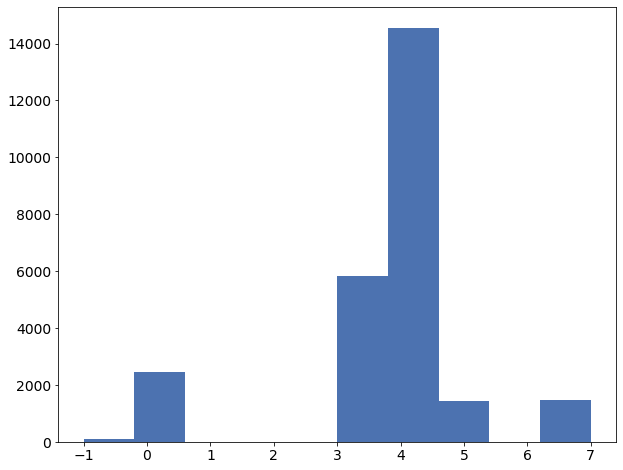

In [108]:
#Histogram of class distribution
fig,ax = plt.subplots(figsize = (10,8))
ax.hist(Magna['timeSignature'])

#### From the current data set
- -1 : 101 examples
- 0 : 2438 examples
- 3 : 5818 examples
- 4 : 14558 exmaples 
- 5: 1438 examples
- 7: 1484 examples
- total: 25837 examples

### TimeSignatureConfidence Breakdown

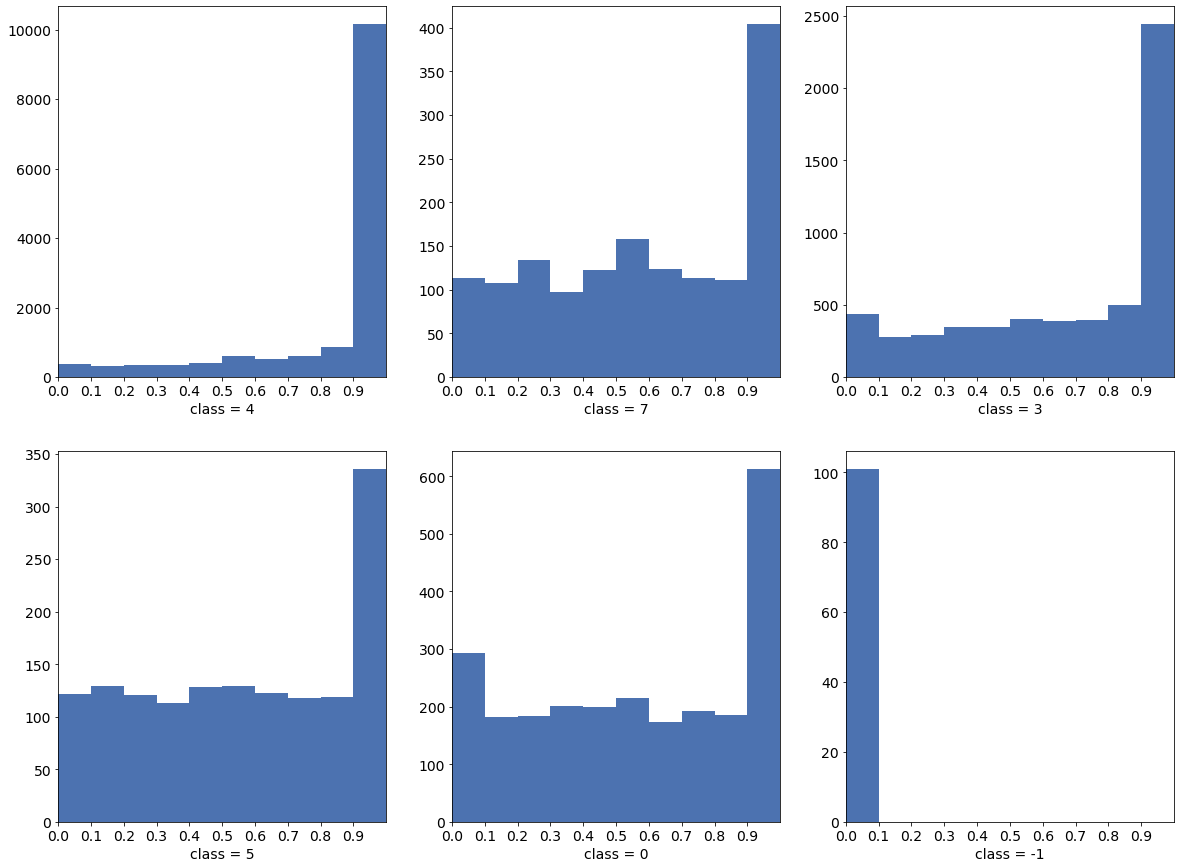

In [72]:
# Distribution of confidence values across each class 

fig = plt.figure(figsize = (20,15))
gs = gridspec.GridSpec(2, 3)
plt.rcParams.update({'font.size': 14})

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_xlim([0,1])
ax1.set_xticks(np.arange(0,1,step = 0.1))

ax2 = fig.add_subplot(gs[0, 1],sharex = ax1)
ax3 = fig.add_subplot(gs[0, 2],sharex = ax1)
ax4 = fig.add_subplot(gs[1, 0],sharex = ax1)
ax5 = fig.add_subplot(gs[1, 1],sharex = ax1)
ax6 = fig.add_subplot(gs[1, 2],sharex = ax1)
axes = [ax1,ax2,ax3,ax4,ax5,ax6]

for ind,val in enumerate(Magna['timeSignature'].unique()):
    axes[ind].hist(Magna[Magna["timeSignature"]==val]["timeSignatureConfidence"],)
    axes[ind].set_xlabel("class = {}".format(val))

### Create and export a Set for manual QA, to determine the validity of the data 

In [11]:
#Generate QA Set
def generate_qa(Magna, n):
    qa_n1 = Magna[Magna['timeSignature']==-1].sort_values(by = ["timeSignatureConfidence"]).reset_index()
    qa_0 = Magna[Magna['timeSignature']==0].sort_values(by = ["timeSignatureConfidence"]).reset_index()
    qa_3 = Magna[Magna['timeSignature']==3].sort_values(by = ["timeSignatureConfidence"]).reset_index()
    qa_4 = Magna[Magna['timeSignature']==4].sort_values(by = ["timeSignatureConfidence"]).reset_index()
    qa_5 = Magna[Magna['timeSignature']==5].sort_values(by = ["timeSignatureConfidence"]).reset_index()
    qa_7 = Magna[Magna['timeSignature']==7].sort_values(by = ["timeSignatureConfidence"]).reset_index()

    qa_4 = qa_4.head(7000)# most of the songs in class 4 have high confidence, so after sorting I took a smaller set  

    qa_set = [qa_n1,qa_0,qa_3,qa_4,qa_5,qa_7]
    n = n/6
    x_n1 = np.linspace(0,len(qa_n1)-1, num = n, dtype = int)
    x_0 = np.linspace(0,len(qa_0)-1, num = n, dtype = int)
    x_3 = np.linspace(0,len(qa_3)-1, num = n, dtype = int)
    x_4 = np.linspace(0,len(qa_4)-1, num = n, dtype = int)
    x_5 = np.linspace(0,len(qa_5)-1, num = n, dtype = int)
    x_7 = np.linspace(0,len(qa_7)-1, num = n, dtype = int)

    idx_set = [x_n1,x_0,x_3,x_4,x_5,x_7]

    qa_df = pd.DataFrame(columns = ["file_path","timeSignature","timeSignatureConfidence"])
    for i in range(len(qa_set)):
        qa_set[i] = qa_set[i].iloc[idx_set[i]]
        qa_set[i] = qa_set[i][["file_path","timeSignature","timeSignatureConfidence"]]
        qa_df = qa_df.append(qa_set[i])
    return qa_df
    
    qa_df = generate_qa(Magna,60)
    #remove additional path in title string for easy searching
    
    qa_df['file_path'] = qa_df["file_path"].str.replace((basepath+'xml_all/',''))
    qa_df.rename(columns = {'file_path','track_name'})
    #qa_df.to_csv(path_or_buf =  "/Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/qa.csv")

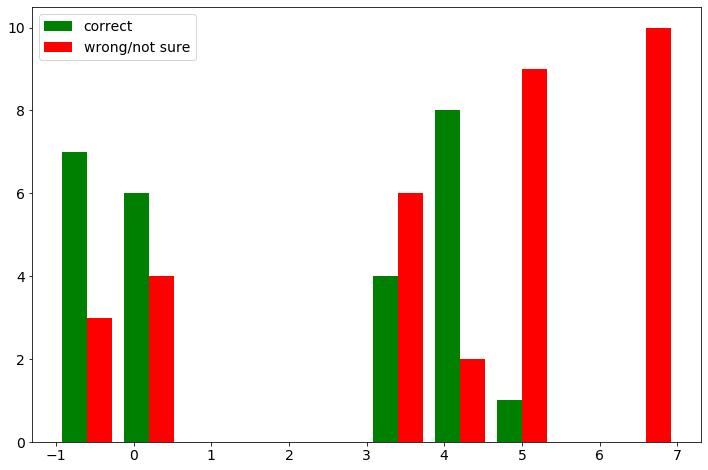

In [107]:
#Load QA set to produce histograms 

qa = pd.read_csv("qa.csv")
groups = qa.groupby("timeSignature")
y = qa[qa["QA result(Y/N)"]=="Y"]
n = qa[qa["QA result(Y/N)"]=="N"]
fig,ax = plt.subplots(figsize = (12,8))
plt.hist(x = [y["timeSignature"],n["timeSignature"]],color = ["g","r"])
plt.legend(loc='top',labels = ["correct","wrong/not sure"])

# Librosa - CNN approach converting audio to spectrograms

- Sampling rate 16kHz
- Hamming window size of 1024 (46ms)
- stride of 512 (23ms)
- resize images to 128 by 256
- Sander Dieleman's Deep Network for spectrogram analysis


In [11]:
import librosa as lb
import librosa.display as dsp
import librosa.effects as eff
import librosa.feature as feat
import PIL
from PIL import Image

hop_length = 512 #number of samples between the the starting point of each segment
margin = 8 # the threshold for extracting percussive elements
window = "hamming"#window type for short time fourier transform
win_length = 1024 #length of the window function, counted by number of samples
sr = 16000 # sampling rate - number of samples per second

In [5]:
def generate_spectrogram(file_path,hop_length,sr,window,win_length,margin): 
    try:
        #Load Audio
        audio, sr = lb.load(file_path,sr = sr)
    except:
        print("file not found")
    #extract percussive element
    perc = eff.percussive(audio, margin = margin)
    #create melspectrogram
    spec =feat.melspectrogram(perc, 
                              sr = sr, 
                              window = window, 
                              win_length = win_length)
    
    #Add to prevent (log(0) case in spec)
    spec = np.log(spec + 1e-9)
    #amplitude to db - represented by color intensity 
    spec = lb.amplitude_to_db(spec, ref = np.max)
    return spec, file_path

In [6]:
def scale(x, min=0.0, max=1.0):
    #scale pixel values
    x_std = (x - x.min()) / (x.max() - x.min())
    x_scaled = x_std * (max - min) + min
    return x_scaled

def alter_image(spec):
    #scale image pixel values
    img = scale(spec,0,255).astype(np.uint8)
    #invert colours, black background, white signal
    img = 255-img
    #flip frequency to be at the bottom
    img = np.flip(img,axis=0)
    return img

def extract_chunks(img):
    #extract consecutive chunks of size (128 by 256)
    img1 = img[:,0:256]
    img2 = img[:,256:2*256]
    img3 = img[:,2*256:3*256]
    imgs = [img1,img2,img3]
    return imgs

## Approach_1 - Experiments 1 - 3

- Based on the QA Set - It would be best to use data with timeSignature Confidence = 1 

- Given this, classes 3 & 4 have much data compared to other classes and this may skew the classifier greatly. Furthermore, spectrogram generation is costly so we will have to limit the amount of data used regardless.

- This reflects the actual problem space -> most of commercial music fits within a 3/4 or 4/4 time signature, with a much smaller set having mixed meter. The prevalence of 4/4 is also greater than that of 3/4 in general

- As a result, the base CNN will output only classes 3 & 4 

- Future Consideration - The output of this binary classifier could determine an "irregular" class with 3 & 4 -> passing on all of these data samples to second classifier specialized in detecting between 5 / 7


In [7]:
#SET UP PATHS SINCE FILES ARE ALL IN DIFFERENT LOCATIONS
basepath = "/Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/"
train_folder = "spec_train/"
test_folder = "spec_test/"
xml_folder = "xml_segmented/"
mp3_folder = "mp3_segmented/"

def get_mp3_path(file_path):
    mp3_path = file_path.replace(xml_folder,mp3_folder)
    #change extension
    mp3_path = mp3_path.replace(".mp3.xml",".mp3")
    return mp3_path

def get_spec_path(file_path,folder,label):
    root,file_name = os.path.split(file_path)
    label = str(label) + "/"
    
    #eg. ...MagnaTagATune/spec_train/3/{{filename}}
    spec_path = os.path.join(basepath, folder , label, file_name)
    #change extension
    spec_path = spec_path.replace(".mp3.xml",".png")
    return spec_path


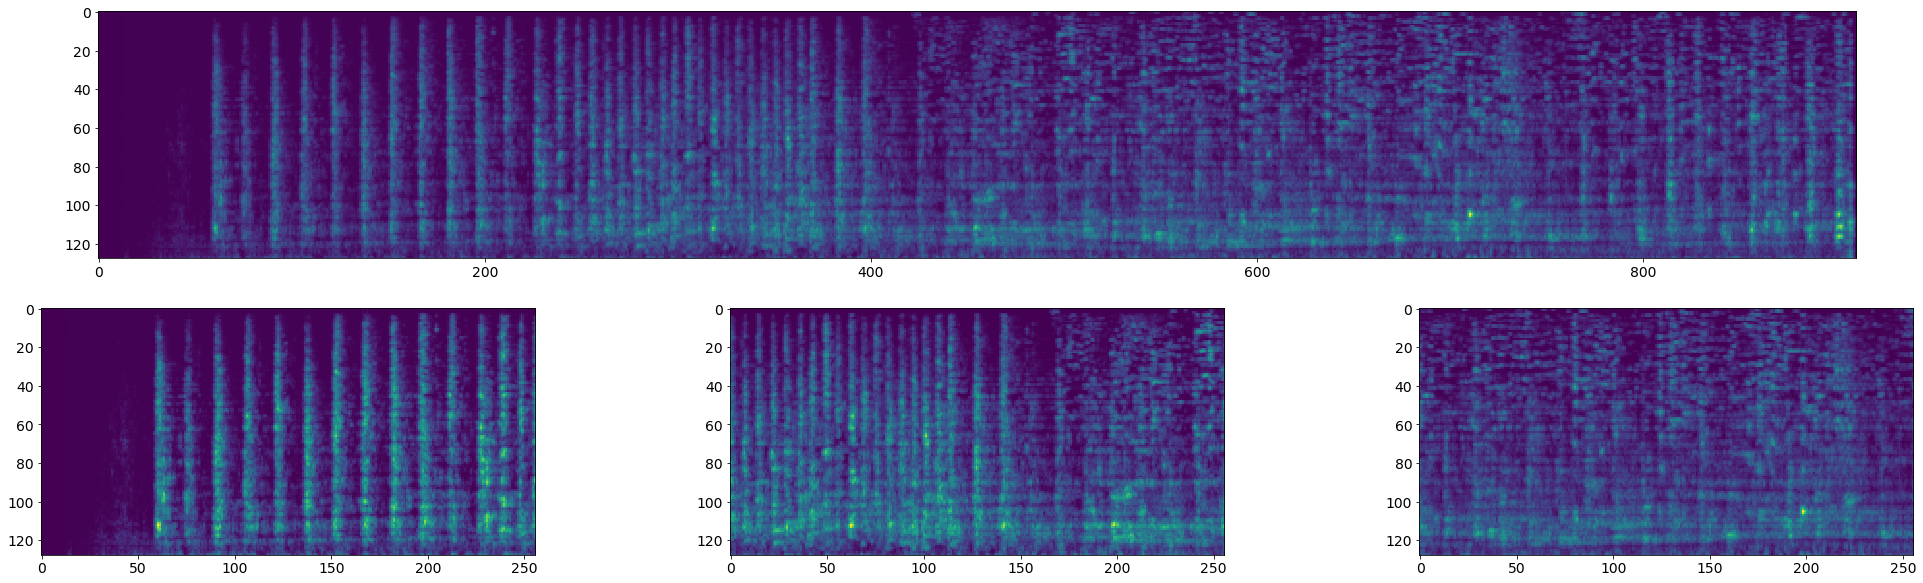

In [14]:
# TEST spectrogram generation 

import warnings #ignore LIBROSA warnings
warnings.filterwarnings('ignore')

testpath = basepath + 'mp3_segmented/0/american_bach_soloists-j_s__bach__cantatas_volume_v-01-gleichwie_der_regen_und_schnee_vom_himmel_fallt_bwv_18_i_sinfonia-0-29.mp3'

spec,fp = generate_spectrogram(testpath, 
                     hop_length = hop_length, 
                     sr = sr, 
                     window = window,
                     win_length = win_length, 
                     margin = margin)

test_full_spec = alter_image(spec)

testimages = extract_chunks(alter_image(spec))

fig = plt.figure(figsize = (35,10))
gs = gridspec.GridSpec(2, 3)
plt.rcParams.update({'font.size': 14})

ax1 = fig.add_subplot(gs[0, 0:3])
ax1.imshow(test_full_spec)
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
axes = [ax2,ax3,ax4]

for ind, img in enumerate(testimages):
    axes[ind].imshow(img)

In [49]:
 seed = 12

In [53]:
# Function to get relevant paths to mp3 files and store them as training and testing dataframes for each class

def get_dataset_paths(Magna,n_size,ratio):
    #For both Magna3 and 4 -> get results where timeSignatureConfidence = 1
    
    Magna4 = Magna.where(Magna["timeSignature"]== 4).dropna()
    Magna4 = Magna4.where(Magna["timeSignatureConfidence"] == 1).dropna()
    Magna4 = Magna4["file_path"]
    print("Magna4 has {} usable data points".format(len(Magna4)))
    
    Magna3 = Magna.where(Magna["timeSignature"]== 3).dropna()
    Magna3 = Magna3.where(Magna["timeSignatureConfidence"] == 1).dropna()
    Magna3 = Magna3["file_path"]
    print("Magna3 has {} usable data points".format(len(Magna3)))
    
    
    #split datasets
    #For 4 -> extract n samples and for 3 -> n/ratio samples 
    #to represent the problem space having an inequal distribution
    
    Magna4_data = Magna4.sample(n_size,random_state = seed)
    Magna4_test = Magna4_data.sample(frac = 0.1,random_state = seed)
    Magna4_train = Magna4_data.drop(Magna4_test.index)
    
    Magna3_data = Magna3.sample(int(n_size/ratio),random_state = seed)
    Magna3_test = Magna3_data.sample(frac = 0.1,random_state = seed)
    Magna3_train = Magna3_data.drop(Magna3_test.index)
    
    return Magna3_train,Magna3_test,Magna4_train,Magna4_test

Magna3_train,Magna3_test,Magna4_train,Magna4_test = get_dataset_paths(Magna,1000,2)

print(len(Magna4_train))
print(len(Magna4_test))
print(len(Magna3_train))
print(len(Magna3_test))

Magna4 has 8763 usable data points
Magna3 has 1831 usable data points
900
100
450
50


In [54]:
def convert_audio(file_path,folder,label):
    #get relevant paths
    mp3_path = get_mp3_path(file_path)
    spec_path = get_spec_path(file_path,folder,label)
    
    #generate spec
    spec,fp = generate_spectrogram(mp3_path,
                 hop_length = hop_length, 
                 sr = sr, 
                 window = window,
                 win_length = win_length, 
                 margin = margin)
    #Alter to make clearer via PIL - uses scale
    img = alter_image(spec)
    # extract 3 chunks
    imgs = extract_chunks(img)
    print("imgs at {} extracted".format(file_path))
    
    for ind,img in enumerate(imgs):
        #For some reason must convert to RGB here even though it remains grayscale?
        #Otherwise error - "Cannot save to format F"
        
        img = Image.fromarray(img).convert("RGB")
        
        #for each audio file with 3 chunks, indicate (p0, p1, p2)
        dest = spec_path.replace(".png", ("_p" + str(ind) + ".png"))
        img.save(dest,"PNG")
        print("Img saved! to {}".format(dest))
    return

        
def convert_paths_to_spec(file_paths, folder, label):
    tasks = file_paths.tolist()
    #Loop through all tasks 
    #Experiment with multi-threading was unsuccessful due to Global Interpreter Lock in python
    #This is a CPU bound task, not I/O bound
    
    for task in tasks:
        convert_audio(task,folder,label)
    return


In [205]:
Magna3_test = convert_paths_to_spec(Magna3_test,test_folder,3)

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/jeff_wahl-meditative_guitar-02-prairie_sky-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/3/jeff_wahl-meditative_guitar-02-prairie_sky-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/3/jeff_wahl-meditative_guitar-02-prairie_sky-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/3/jeff_wahl-meditative_guitar-02-prairie_sky-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/rob_costlow-woods_of_chaos-05-true_gemini-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/3/rob_costlow-woods_of_chaos-05-true_gemini-146-175_p0.png
Img saved! to /Users/ARN

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/kyiv_chamber_choir-masterpieces_of_the_ukrainian_choral_baroque-03-do_not_forsake_me-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/3/kyiv_chamber_choir-masterpieces_of_the_ukrainian_choral_baroque-03-do_not_forsake_me-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/3/kyiv_chamber_choir-masterpieces_of_the_ukrainian_choral_baroque-03-do_not_forsake_me-88-117_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/3/kyiv_chamber_choir-masterpieces_of_the_ukrainian_choral_baroque-03-do_not_forsake_me-88-117_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/0/william_brooks-bitter_circus-07-the_hanging_of_allen_scott_johnson-262-291.mp

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/katherine_roberts_perl-j_s__bach_french_suites-26-suite_no_5_in_g_major_bwv_816_gigue-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/3/katherine_roberts_perl-j_s__bach_french_suites-26-suite_no_5_in_g_major_bwv_816_gigue-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/3/katherine_roberts_perl-j_s__bach_french_suites-26-suite_no_5_in_g_major_bwv_816_gigue-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/3/katherine_roberts_perl-j_s__bach_french_suites-26-suite_no_5_in_g_major_bwv_816_gigue-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/solace-the_gathering_season-05-aenaem-204-233.mp3.xml extracted
Img saved! to

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/philharmonia_baroque-beethoven_symphonies_no_3_eroica_and_no_8-06-8_symph_3rd-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/3/philharmonia_baroque-beethoven_symphonies_no_3_eroica_and_no_8-06-8_symph_3rd-204-233_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/3/philharmonia_baroque-beethoven_symphonies_no_3_eroica_and_no_8-06-8_symph_3rd-204-233_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/3/philharmonia_baroque-beethoven_symphonies_no_3_eroica_and_no_8-06-8_symph_3rd-204-233_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/minstrel_spirit-enter_the_woods-03-dream_of_spain-117-146.mp3.xml extracted
Img saved! to /Users/ARNA

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/2/antiguru-fall_submissions-04-sideways-407-436.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/3/antiguru-fall_submissions-04-sideways-407-436_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/3/antiguru-fall_submissions-04-sideways-407-436_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/3/antiguru-fall_submissions-04-sideways-407-436_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/tim_rayborn-qadim-12-hurrian_hymn_to_nikkkal__kinnor_ancient_near_east-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/3/tim_rayborn-qadim-12-hurrian_hymn_to_nikkkal__kinnor_ancient_n

In [209]:
Magna4_test = convert_paths_to_spec(Magna4_test,test_folder,4)

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/2/vito_paternoster-cd2bach_cello_suites-02-suite_iii_in_do_maggiore__allemande-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/4/vito_paternoster-cd2bach_cello_suites-02-suite_iii_in_do_maggiore__allemande-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/4/vito_paternoster-cd2bach_cello_suites-02-suite_iii_in_do_maggiore__allemande-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/4/vito_paternoster-cd2bach_cello_suites-02-suite_iii_in_do_maggiore__allemande-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/2/anup-embrace-08-resolve-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_P

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/mijo-fata_morgana-04-fata_morgana-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/4/mijo-fata_morgana-04-fata_morgana-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/4/mijo-fata_morgana-04-fata_morgana-146-175_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/4/mijo-fata_morgana-04-fata_morgana-146-175_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/solar_cycle-sunlight-07-dream_of_you-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/4/solar_cycle-sunlight-07-dream_of_you-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classi

Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/4/plunkett-14_days-05-sun_shines-233-262_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/4/plunkett-14_days-05-sun_shines-233-262_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/very_large_array-stuff-08-slow_there-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/4/very_large_array-stuff-08-slow_there-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/4/very_large_array-stuff-08-slow_there-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/4/very_large_array-stuff-08-slow_there-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/data

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/liquid_zen-elements_at_loop_10-10-you_rise-233-262.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/4/liquid_zen-elements_at_loop_10-10-you_rise-233-262_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/4/liquid_zen-elements_at_loop_10-10-you_rise-233-262_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/4/liquid_zen-elements_at_loop_10-10-you_rise-233-262_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/jeff_wahl-guitarscapes-19-train-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test/4/jeff_wahl-guitarscapes-19-train-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/C

UnboundLocalError: local variable 'audio' referenced before assignment

In [217]:
Magna4_train = convert_paths_to_spec(Magna4_train,train_folder,4)

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/richard_savino-legrenzi__venice_before_vivaldi-05-sonata_la_foscari_a_due__violino_e_violone_o_faghotto-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/richard_savino-legrenzi__venice_before_vivaldi-05-sonata_la_foscari_a_due__violino_e_violone_o_faghotto-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/richard_savino-legrenzi__venice_before_vivaldi-05-sonata_la_foscari_a_due__violino_e_violone_o_faghotto-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/richard_savino-legrenzi__venice_before_vivaldi-05-sonata_la_foscari_a_due__violino_e_violone_o_faghotto-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/so

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/domased-return_back-03-warning_signal-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/domased-return_back-03-warning_signal-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/domased-return_back-03-warning_signal-88-117_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/domased-return_back-03-warning_signal-88-117_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/8/philharmonia_baroque-cd2_scarlatti__cecilian_vespers-23-salve_regina__ad_te-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/philharmonia_baroque-cd2_scarlatti__cecilian_vespers-23-s

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/strojovna_07-mirnix-02-cmuch-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/strojovna_07-mirnix-02-cmuch-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/strojovna_07-mirnix-02-cmuch-146-175_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/strojovna_07-mirnix-02-cmuch-146-175_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/rhonda_lorence-winter_moon-02-imprints-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/rhonda_lorence-winter_moon-02-imprints-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datas

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/falik-dreams_from_the_machine-04-pans_procession-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/falik-dreams_from_the_machine-04-pans_procession-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/falik-dreams_from_the_machine-04-pans_procession-117-146_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/falik-dreams_from_the_machine-04-pans_procession-117-146_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/belief_systems-eproms-05-happy_accidents-262-291.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/belief_systems-eproms-05-happy_accidents-2

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/dj_markitos-inside_your_dreams-01-interplanetary_travel-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/dj_markitos-inside_your_dreams-01-interplanetary_travel-204-233_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/dj_markitos-inside_your_dreams-01-interplanetary_travel-204-233_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/dj_markitos-inside_your_dreams-01-interplanetary_travel-204-233_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/the_headroom_project-jetuton_andawai-06-manu_yu-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/the_hea

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/spinecar-autophile-09-muse-262-291.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/spinecar-autophile-09-muse-262-291_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/spinecar-autophile-09-muse-262-291_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/spinecar-autophile-09-muse-262-291_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/dac_crowell-the_sea_and_the_sky-01-tidal_motion-436-465.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/dac_crowell-the_sea_and_the_sky-01-tidal_motion-436-465_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classi

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/domased-slowdown-02-sunlight-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/domased-slowdown-02-sunlight-204-233_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/domased-slowdown-02-sunlight-204-233_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/domased-slowdown-02-sunlight-204-233_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/the_wretch-ambulatory-06-ambulatory-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/the_wretch-ambulatory-06-ambulatory-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/dataset

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/yongen-moonrise-07-vertigo-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/yongen-moonrise-07-vertigo-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/yongen-moonrise-07-vertigo-146-175_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/yongen-moonrise-07-vertigo-146-175_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/falik-elvolution-06-ay_mambo-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/falik-elvolution-06-ay_mambo-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/2/magnatune_remixed-ridin_the_faders_2-05-je_suis_un_trio__lo_tag_blanco_and_fourstones-291-320.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/magnatune_remixed-ridin_the_faders_2-05-je_suis_un_trio__lo_tag_blanco_and_fourstones-291-320_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/magnatune_remixed-ridin_the_faders_2-05-je_suis_un_trio__lo_tag_blanco_and_fourstones-291-320_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/magnatune_remixed-ridin_the_faders_2-05-je_suis_un_trio__lo_tag_blanco_and_fourstones-291-320_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/les_filles_de_sainte_colombe-german_music_for_viols_and_harpsichor

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/solace-rhythm_of_the_dance-08-sword_dance_routine-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/solace-rhythm_of_the_dance-08-sword_dance_routine-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/solace-rhythm_of_the_dance-08-sword_dance_routine-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/solace-rhythm_of_the_dance-08-sword_dance_routine-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/0/barbara_leoni-human_needs-07-ring_around_the_rosey-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/barbara_leoni-human_needs-07-ring_aro

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/yongen-yello_haus-04-scream-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/yongen-yello_haus-04-scream-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/yongen-yello_haus-04-scream-117-146_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/yongen-yello_haus-04-scream-117-146_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/burnshee_thornside-rock_this_moon-04-dear_error-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/burnshee_thornside-rock_this_moon-04-dear_error-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Cl

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/seismic_anamoly-afterburner-07-ten_million_tears-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/seismic_anamoly-afterburner-07-ten_million_tears-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/seismic_anamoly-afterburner-07-ten_million_tears-146-175_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/seismic_anamoly-afterburner-07-ten_million_tears-146-175_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/farallon_recorder_quartet-ludwig_senfl-02-mich_wndert_sehr-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/farallon_recorder_quartet-

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/wicked_boy-chemistry-03-shodusion-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/wicked_boy-chemistry-03-shodusion-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/wicked_boy-chemistry-03-shodusion-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/wicked_boy-chemistry-03-shodusion-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/introspekt-ideology-09-nothing_to_fear-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/introspekt-ideology-09-nothing_to_fear-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Pr

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/various_artists-south_by_southwest_compilation-07-i_dont_care_if_you_lie_c_layne-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/various_artists-south_by_southwest_compilation-07-i_dont_care_if_you_lie_c_layne-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/various_artists-south_by_southwest_compilation-07-i_dont_care_if_you_lie_c_layne-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/various_artists-south_by_southwest_compilation-07-i_dont_care_if_you_lie_c_layne-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/shiva_in_exile-ethnic-10-nomad-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/M

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/four_stones_net-ridin_the_faders-11-part_11-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/four_stones_net-ridin_the_faders-11-part_11-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/four_stones_net-ridin_the_faders-11-part_11-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/four_stones_net-ridin_the_faders-11-part_11-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/claire_fitch-ambiencellist_part_ii-08-spectral_cellist-233-262.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/claire_fitch-ambiencellist_part_ii-08-spectral_cellist-233-2

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/8/hybris-the_first_words-07-hate-291-320.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/hybris-the_first_words-07-hate-291-320_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/hybris-the_first_words-07-hate-291-320_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/hybris-the_first_words-07-hate-291-320_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/thursday_group-uncle_mean-05-pelican_fan-465-494.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/thursday_group-uncle_mean-05-pelican_fan-465-494_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Clas

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/domased-selection-04-all_is_over_deep_mix-233-262.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/domased-selection-04-all_is_over_deep_mix-233-262_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/domased-selection-04-all_is_over_deep_mix-233-262_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/domased-selection-04-all_is_over_deep_mix-233-262_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/dj_markitos-unreachable_destiny-03-definition_of_freedom-494-523.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/dj_markitos-unreachable_destiny-03-definition_of_freed

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/dr_kuch-analog_disease-01-forbidden_beat-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/dr_kuch-analog_disease-01-forbidden_beat-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/dr_kuch-analog_disease-01-forbidden_beat-146-175_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/dr_kuch-analog_disease-01-forbidden_beat-146-175_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/wicked_allstars-dark_clouds-11-no_mercy-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/wicked_allstars-dark_clouds-11-no_mercy-204-233_p0.png
Img saved! to /Users

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/etherine-gleam-05-modulation-233-262.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/etherine-gleam-05-modulation-233-262_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/etherine-gleam-05-modulation-233-262_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/etherine-gleam-05-modulation-233-262_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/seismic_anamoly-ramifications-08-always_on_my_mind-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/seismic_anamoly-ramifications-08-always_on_my_mind-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLea

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/jamie_janover-now_center_of_time-01-arc-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/jamie_janover-now_center_of_time-01-arc-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/jamie_janover-now_center_of_time-01-arc-146-175_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/jamie_janover-now_center_of_time-01-arc-146-175_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/magnatune_compilation-new_age_and_jazz-06-hans_christian_backwards_with_my_eyes_closed-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/magnatune_compilation-new_age_and_

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/the_headroom_project-jetuton_andawai-05-yesterday-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/the_headroom_project-jetuton_andawai-05-yesterday-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/the_headroom_project-jetuton_andawai-05-yesterday-146-175_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/the_headroom_project-jetuton_andawai-05-yesterday-146-175_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/lizzi-love_and_you_and_i-09-my_destination-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/lizzi-love_and_you_and_i-09-my_desti

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/etherfysh-box_of_fysh-05-river_of_mills-320-349.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/etherfysh-box_of_fysh-05-river_of_mills-320-349_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/etherfysh-box_of_fysh-05-river_of_mills-320-349_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/etherfysh-box_of_fysh-05-river_of_mills-320-349_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/chris_juergensen-prospects-06-absolution-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/chris_juergensen-prospects-06-absolution-59-88_p0.png
Img saved! to /Users/ARNAV

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/0/jeffrey_luck_lucas-what_we_whisper-07-i_cry_you_all_the_time-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/jeffrey_luck_lucas-what_we_whisper-07-i_cry_you_all_the_time-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/jeffrey_luck_lucas-what_we_whisper-07-i_cry_you_all_the_time-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/jeffrey_luck_lucas-what_we_whisper-07-i_cry_you_all_the_time-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/ambient_teknology-phoenix-05-war_and_sleep-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/am

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/0/jeffrey_luck_lucas-what_we_whisper-01-you_knew_it_well-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/jeffrey_luck_lucas-what_we_whisper-01-you_knew_it_well-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/jeffrey_luck_lucas-what_we_whisper-01-you_knew_it_well-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/jeffrey_luck_lucas-what_we_whisper-01-you_knew_it_well-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/stargarden-the_art_of_analog_diversion-03-pleaides-262-291.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/stargarden-the_a

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/liquid_zen-elements_at_loop_10-05-spirit-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/liquid_zen-elements_at_loop_10-05-spirit-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/liquid_zen-elements_at_loop_10-05-spirit-117-146_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/liquid_zen-elements_at_loop_10-05-spirit-117-146_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/dj_cary-eastern_grooves-09-death_and_rainkenji_williams-262-291.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/dj_cary-eastern_grooves-09-death_and_rainkenji_williams-262

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/0/daniel_ben_pienaar-book_2_cd2_welltempered_clavier-10-prelude_and_fugue_no__17_in_aflat_major_bwv_886_fuga-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/daniel_ben_pienaar-book_2_cd2_welltempered_clavier-10-prelude_and_fugue_no__17_in_aflat_major_bwv_886_fuga-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/daniel_ben_pienaar-book_2_cd2_welltempered_clavier-10-prelude_and_fugue_no__17_in_aflat_major_bwv_886_fuga-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/daniel_ben_pienaar-book_2_cd2_welltempered_clavier-10-prelude_and_fugue_no__17_in_aflat_major_bwv_886_fuga-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_se

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/8/burning_babylon-knives_to_the_treble-08-satta_stylee-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/burning_babylon-knives_to_the_treble-08-satta_stylee-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/burning_babylon-knives_to_the_treble-08-satta_stylee-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/burning_babylon-knives_to_the_treble-08-satta_stylee-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/kenji_williams-faces_of_epiphany-08-free_energy-465-494.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/kenji_williams-face

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/janine_johnson-german_keyboard_masters-15-chorale_partita_pachelbel-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/janine_johnson-german_keyboard_masters-15-chorale_partita_pachelbel-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/janine_johnson-german_keyboard_masters-15-chorale_partita_pachelbel-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/janine_johnson-german_keyboard_masters-15-chorale_partita_pachelbel-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/memories_of_tomorrow-waiting_for_dawn-09-not_like_this-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_P

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/kenji_williams-faces_of_epiphany-08-free_energy-494-523.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/kenji_williams-faces_of_epiphany-08-free_energy-494-523_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/kenji_williams-faces_of_epiphany-08-free_energy-494-523_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/kenji_williams-faces_of_epiphany-08-free_energy-494-523_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/ambient_teknology-phoenix-01-ambient_teknology-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/ambient_teknology-phoenix-01-ambient_tek

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/c_layne-the_sun_will_come_out_to_blind_you-10-everybodys_going_underground-262-291.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/c_layne-the_sun_will_come_out_to_blind_you-10-everybodys_going_underground-262-291_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/c_layne-the_sun_will_come_out_to_blind_you-10-everybodys_going_underground-262-291_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/c_layne-the_sun_will_come_out_to_blind_you-10-everybodys_going_underground-262-291_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/seismic_anamoly-ramifications-01-just_dont_give_a_damn-291-320.mp3.xml extracted
Img saved! to /Users/ARNAV/De

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/8/burning_babylon-knives_to_the_treble-08-satta_stylee-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/burning_babylon-knives_to_the_treble-08-satta_stylee-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/burning_babylon-knives_to_the_treble-08-satta_stylee-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/burning_babylon-knives_to_the_treble-08-satta_stylee-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/0/jeffrey_luck_lucas-what_we_whisper-07-i_cry_you_all_the_time-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/jeffrey_luck_lucas-wh

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/the_kokoon-berlin-01-impressions-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/the_kokoon-berlin-01-impressions-204-233_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/the_kokoon-berlin-01-impressions-204-233_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/the_kokoon-berlin-01-impressions-204-233_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/paul_berget-j_s__bach_on_the_lute-06-gigue__bwv_996-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/paul_berget-j_s__bach_on_the_lute-06-gigue__bwv_996-88-117_p0.png
Img saved! to /Users/ARNAV/Des

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/mountain_mirrors-lunar_ecstasy-02-lunar_ecstasy-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/mountain_mirrors-lunar_ecstasy-02-lunar_ecstasy-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/mountain_mirrors-lunar_ecstasy-02-lunar_ecstasy-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/mountain_mirrors-lunar_ecstasy-02-lunar_ecstasy-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/the_seldon_plan-making_circles-03-westchester-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/the_seldon_plan-making_circles-03-westchester-0-29_p

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/domased-new_memories-08-transfusion-291-320.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/domased-new_memories-08-transfusion-291-320_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/domased-new_memories-08-transfusion-291-320_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/domased-new_memories-08-transfusion-291-320_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/2/solace-ahsas-07-redemption_128_84-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/solace-ahsas-07-redemption_128_84-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/various_artists-the_2007_magnatune_records_sampler-06-suerte_mijo_arthur_yoria-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/various_artists-the_2007_magnatune_records_sampler-06-suerte_mijo_arthur_yoria-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/various_artists-the_2007_magnatune_records_sampler-06-suerte_mijo_arthur_yoria-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/various_artists-the_2007_magnatune_records_sampler-06-suerte_mijo_arthur_yoria-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/norine_braun-crow-01-salem-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearnin

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/dj_cary-downtempo_chill_2-03-choice_curl-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/dj_cary-downtempo_chill_2-03-choice_curl-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/dj_cary-downtempo_chill_2-03-choice_curl-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/dj_cary-downtempo_chill_2-03-choice_curl-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/falik-dreams_from_the_machine-05-when_i_look_into_her_eyes-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/falik-dreams_from_the_machine-05-when_i_look_into_her_eyes-0-29_p0.

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/four_stones_net-ridin_the_faders-11-part_11-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/four_stones_net-ridin_the_faders-11-part_11-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/four_stones_net-ridin_the_faders-11-part_11-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/four_stones_net-ridin_the_faders-11-part_11-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/dr_kuch-analog_disease-06-oui_mossieur_chuibelle-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/dr_kuch-analog_disease-06-oui_mossieur_chuibelle-59-88_p

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/shiva_in_exile-ethnic-11-ethnosphere-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/shiva_in_exile-ethnic-11-ethnosphere-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/shiva_in_exile-ethnic-11-ethnosphere-88-117_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/shiva_in_exile-ethnic-11-ethnosphere-88-117_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/liquid_zen-magic_midsummer-11-orange_silhouette-233-262.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/liquid_zen-magic_midsummer-11-orange_silhouette-233-262_p0.png
Img saved! to /Users/ARN

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/jeni_melia-the_lost_art_of_wooing-12-come_away_come_sweet_love_john_dowland-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/jeni_melia-the_lost_art_of_wooing-12-come_away_come_sweet_love_john_dowland-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/jeni_melia-the_lost_art_of_wooing-12-come_away_come_sweet_love_john_dowland-117-146_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/jeni_melia-the_lost_art_of_wooing-12-come_away_come_sweet_love_john_dowland-117-146_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/introspekt-ideology-05-mekhanix-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLear

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/artemis-gravity-05-lagoon_baba-378-407.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/artemis-gravity-05-lagoon_baba-378-407_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/artemis-gravity-05-lagoon_baba-378-407_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/artemis-gravity-05-lagoon_baba-378-407_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/8/mercy_machine-in_your_bed__the_remixes-08-invisible_cosmic_sea_shanty_mix-320-349.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/mercy_machine-in_your_bed__the_remixes-08-invisible_cosmic_sea_shanty_mix-320-349

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/ambient_teknology-the_all_seeing_eye_project-04-confusion_says-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/ambient_teknology-the_all_seeing_eye_project-04-confusion_says-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/ambient_teknology-the_all_seeing_eye_project-04-confusion_says-117-146_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/ambient_teknology-the_all_seeing_eye_project-04-confusion_says-117-146_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/solace-vadalna-07-darban_jooth_na_boleyomega_mix-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaT

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/hoxman-synthesis_of_five-08-blue_night-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/hoxman-synthesis_of_five-08-blue_night-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/hoxman-synthesis_of_five-08-blue_night-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/hoxman-synthesis_of_five-08-blue_night-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/falik-dreams_from_the_machine-01-ika-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/falik-dreams_from_the_machine-01-ika-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/Mach

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/electric_frankenstein-dead_and_back-03-good_for_nothing-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/electric_frankenstein-dead_and_back-03-good_for_nothing-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/electric_frankenstein-dead_and_back-03-good_for_nothing-117-146_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/electric_frankenstein-dead_and_back-03-good_for_nothing-117-146_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/the_wretch-cyst-10-feel_the_burning-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/the_wretch-cyst-10-fe

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/solace-satya-04-bhaarat_india-291-320.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/solace-satya-04-bhaarat_india-291-320_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/solace-satya-04-bhaarat_india-291-320_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/solace-satya-04-bhaarat_india-291-320_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/zilla-egg-04-a_great_many_maps-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/zilla-egg-04-a_great_many_maps-204-233_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/Magn

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/liquid_zen-oscilloscope-09-dense_properties-262-291.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/liquid_zen-oscilloscope-09-dense_properties-262-291_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/liquid_zen-oscilloscope-09-dense_properties-262-291_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/liquid_zen-oscilloscope-09-dense_properties-262-291_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/pizzle-party_patrol-11-donkey_punch-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/pizzle-party_patrol-11-donkey_punch-0-29_p0.png
Img saved! to /Users/A

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/janine_johnson-j_s__bach_works_for_harpsichord-17-gott_der_wohn_uns_bei__chorale_prelude-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/janine_johnson-j_s__bach_works_for_harpsichord-17-gott_der_wohn_uns_bei__chorale_prelude-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/janine_johnson-j_s__bach_works_for_harpsichord-17-gott_der_wohn_uns_bei__chorale_prelude-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/janine_johnson-j_s__bach_works_for_harpsichord-17-gott_der_wohn_uns_bei__chorale_prelude-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/8/skitzo-hellavator_musick-06-satans_grave-30-59.mp3.xml extract

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/seismic_anamoly-afterburner-07-ten_million_tears-320-349.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/seismic_anamoly-afterburner-07-ten_million_tears-320-349_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/seismic_anamoly-afterburner-07-ten_million_tears-320-349_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/seismic_anamoly-afterburner-07-ten_million_tears-320-349_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/la_primavera-english_renaissance_music-21-sweet_kate_jones-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/la_primavera-english_renais

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/c_layne-the_sun_will_come_out_to_blind_you-03-shes_on_my_mind-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/c_layne-the_sun_will_come_out_to_blind_you-03-shes_on_my_mind-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/c_layne-the_sun_will_come_out_to_blind_you-03-shes_on_my_mind-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/c_layne-the_sun_will_come_out_to_blind_you-03-shes_on_my_mind-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/curl-inner-03-ull_never_know-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/cu

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/zilla-egg-03-velvet_periscope-320-349.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/zilla-egg-03-velvet_periscope-320-349_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/zilla-egg-03-velvet_periscope-320-349_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/zilla-egg-03-velvet_periscope-320-349_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/tim_rayborn-the_path_beyond-15-en_el_vettem-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/tim_rayborn-the_path_beyond-15-en_el_vettem-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classi

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/mijo-fata_morgana-12-slow_motion-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/mijo-fata_morgana-12-slow_motion-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/mijo-fata_morgana-12-slow_motion-88-117_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/mijo-fata_morgana-12-slow_motion-88-117_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/processor-insomnia-08-shiraio_pig-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/processor-insomnia-08-shiraio_pig-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/d

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/various_artists-the_art_of_persuasion-07-diabolique_burning_babylon-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/various_artists-the_art_of_persuasion-07-diabolique_burning_babylon-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/various_artists-the_art_of_persuasion-07-diabolique_burning_babylon-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/various_artists-the_art_of_persuasion-07-diabolique_burning_babylon-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/introspekt-ideology-05-mekhanix-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/sand_craig_and_dornenburg-biber_violin_sonatas-07-biber_rosary_sonata_12_in_c_major_the_ascension-233-262.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/sand_craig_and_dornenburg-biber_violin_sonatas-07-biber_rosary_sonata_12_in_c_major_the_ascension-233-262_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/sand_craig_and_dornenburg-biber_violin_sonatas-07-biber_rosary_sonata_12_in_c_major_the_ascension-233-262_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/sand_craig_and_dornenburg-biber_violin_sonatas-07-biber_rosary_sonata_12_in_c_major_the_ascension-233-262_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/janine_johnson-j_s

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/2/solace-ahsas-06-blessings_adani_44-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/solace-ahsas-06-blessings_adani_44-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/solace-ahsas-06-blessings_adani_44-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/solace-ahsas-06-blessings_adani_44-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/the_bots-now_is_the_time-03-freak-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/the_bots-now_is_the_time-03-freak-204-233_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/atomic_opera-penguin_dust-06-november-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/atomic_opera-penguin_dust-06-november-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/atomic_opera-penguin_dust-06-november-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/atomic_opera-penguin_dust-06-november-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/reza_manzoori-restrung-08-valley-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/reza_manzoori-restrung-08-valley-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classi

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/the_rajdhani_quartet-the_gandhi_memorial_concert-01-raga_hansa_kalyani-1451-1480.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/the_rajdhani_quartet-the_gandhi_memorial_concert-01-raga_hansa_kalyani-1451-1480_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/the_rajdhani_quartet-the_gandhi_memorial_concert-01-raga_hansa_kalyani-1451-1480_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/the_rajdhani_quartet-the_gandhi_memorial_concert-01-raga_hansa_kalyani-1451-1480_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/cargo_cult-alchemy-05-our_song-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classif

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/pizzle-party_patrol-12-a_little_exposure-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/pizzle-party_patrol-12-a_little_exposure-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/pizzle-party_patrol-12-a_little_exposure-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/pizzle-party_patrol-12-a_little_exposure-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/trancevision-lemuria-08-lemuria-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/trancevision-lemuria-08-lemuria-204-233_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/Machin

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/curandero-curandero-02-la_tormenta-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/curandero-curandero-02-la_tormenta-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/curandero-curandero-02-la_tormenta-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/curandero-curandero-02-la_tormenta-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/phebe_craig_and_katherine_westine-beside_themselves-09-js_bach_concerto_in_c_major_for_2_harpsichords_adagio_ovvero_largo-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/phebe_craig_and_k

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/lisa_debenedictis-fruitless-09-cello_song-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/lisa_debenedictis-fruitless-09-cello_song-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/lisa_debenedictis-fruitless-09-cello_song-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/lisa_debenedictis-fruitless-09-cello_song-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/strojovna_07-iii-06-teegma-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/strojovna_07-iii-06-teegma-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Clas

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/mrdc-plethora-02-shrine-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/mrdc-plethora-02-shrine-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/mrdc-plethora-02-shrine-88-117_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/mrdc-plethora-02-shrine-88-117_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/jacob_heringman_and_catherine_king-alonso_mudarra_songs_and_solos-21-pavana_4_course_guitar-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/jacob_heringman_and_catherine_king-alonso_mudarra_songs_and_solos-21-pavana_4_course_guitar-59-88

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/etherine-24_days-05-bring_it_down-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/etherine-24_days-05-bring_it_down-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/etherine-24_days-05-bring_it_down-146-175_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/etherine-24_days-05-bring_it_down-146-175_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/zilla-egg-02-wicker_pilots-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/zilla-egg-02-wicker_pilots-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datas

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/magnatune_compilation-new_age_and_jazz-09-bjorn_fogelberg_karooshi_porn-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/magnatune_compilation-new_age_and_jazz-09-bjorn_fogelberg_karooshi_porn-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/magnatune_compilation-new_age_and_jazz-09-bjorn_fogelberg_karooshi_porn-146-175_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/magnatune_compilation-new_age_and_jazz-09-bjorn_fogelberg_karooshi_porn-146-175_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/heavy_mellow-acoustic_abstracts-02-maybe_itll_rain-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/Machine

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/magnatune_com-magnatune_at_the_cc_salon-05-oui_mossieur_chuibelle_dr_kuch-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/magnatune_com-magnatune_at_the_cc_salon-05-oui_mossieur_chuibelle_dr_kuch-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/magnatune_com-magnatune_at_the_cc_salon-05-oui_mossieur_chuibelle_dr_kuch-88-117_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/magnatune_com-magnatune_at_the_cc_salon-05-oui_mossieur_chuibelle_dr_kuch-88-117_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/rob_costlow-woods_of_chaos-10-twilight-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/c__layne-potemkin_villages-08-disaffected-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/c__layne-potemkin_villages-08-disaffected-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/c__layne-potemkin_villages-08-disaffected-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/c__layne-potemkin_villages-08-disaffected-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/zilla-egg-03-velvet_periscope-291-320.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/zilla-egg-03-velvet_periscope-291-320_p0.png
Img saved! to /Users/ARNAV/Desktop/C

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/american_bach_soloists-j_s__bach__mass_in_b_minor_cd2-11-osanna_in_exelsis-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/american_bach_soloists-j_s__bach__mass_in_b_minor_cd2-11-osanna_in_exelsis-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/american_bach_soloists-j_s__bach__mass_in_b_minor_cd2-11-osanna_in_exelsis-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/american_bach_soloists-j_s__bach__mass_in_b_minor_cd2-11-osanna_in_exelsis-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/magnatune_compilation-world_fusion-05-anup_resolve-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/Machi

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/domased-new_memories-03-crazy_days-291-320.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/domased-new_memories-03-crazy_days-291-320_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/domased-new_memories-03-crazy_days-291-320_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/domased-new_memories-03-crazy_days-291-320_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/magnatune_compilation-high_energy_rock_and_roll-14-pizzle_in_my_livid_eyes-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/magnatune_compilation-high_energy_rock_and_roll-14-pizzle_in_my_liv

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/the_west_exit-nocturne-02-artificial-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/the_west_exit-nocturne-02-artificial-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/the_west_exit-nocturne-02-artificial-117-146_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/the_west_exit-nocturne-02-artificial-117-146_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/ensemble_mirable-triemer_six_cello_sonatas-05-sonata_1_giga_allegro-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/ensemble_mirable-triemer_six_cello_sonatas-05-sonata_1_giga_all

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/nova_express-gimme_some-02-walk_away-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/nova_express-gimme_some-02-walk_away-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/nova_express-gimme_some-02-walk_away-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/nova_express-gimme_some-02-walk_away-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/satori-healing_sounds_of_tibet-01-moon_night-233-262.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/satori-healing_sounds_of_tibet-01-moon_night-233-262_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/falik-streaks_and_strokes-11-xanthanon-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/falik-streaks_and_strokes-11-xanthanon-204-233_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/falik-streaks_and_strokes-11-xanthanon-204-233_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/falik-streaks_and_strokes-11-xanthanon-204-233_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/four_stones_net-ridin_the_faders-04-part_4-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/four_stones_net-ridin_the_faders-04-part_4-59-88_p0.png
Img saved! to /Users/ARNAV

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/dj_cary-downtempo_chill-02-sunday_bed_curl-291-320.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/dj_cary-downtempo_chill-02-sunday_bed_curl-291-320_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/dj_cary-downtempo_chill-02-sunday_bed_curl-291-320_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/dj_cary-downtempo_chill-02-sunday_bed_curl-291-320_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/minstrel_spirit-enter_the_woods-12-winds_are_cryin_edited_version-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/minstrel_spirit-enter_the_woods-12-winds_are

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/norine_braun-modern_anguish-14-watching_shadows-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/norine_braun-modern_anguish-14-watching_shadows-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/norine_braun-modern_anguish-14-watching_shadows-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/norine_braun-modern_anguish-14-watching_shadows-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/tim_rayborn-ashek-08-ravan-465-494.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/tim_rayborn-ashek-08-ravan-465-494_p0.png
Img saved! to /Use

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/soulprint-in_spite_of_it_all-01-soul_print-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/soulprint-in_spite_of_it_all-01-soul_print-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/soulprint-in_spite_of_it_all-01-soul_print-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/soulprint-in_spite_of_it_all-01-soul_print-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/bjorn_fogelberg-karooshi_porn-03-sixfiveoneoh-639-668.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/bjorn_fogelberg-karooshi_porn-03-sixfiveoneoh-639-668_p0.png


imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/wicked_boy-chemistry-05-i_am_an_old_mam-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/wicked_boy-chemistry-05-i_am_an_old_mam-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/wicked_boy-chemistry-05-i_am_an_old_mam-88-117_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/wicked_boy-chemistry-05-i_am_an_old_mam-88-117_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/artemis-orbits-07-la_belle_subbelle_mix__mijo-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/4/artemis-orbits-07-la_belle_subbelle_mix__mijo-146-175_p0.png
Img saved! to /U

In [207]:
Magna3_train = convert_paths_to_spec(Magna3_train,train_folder,3)

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/0/beth_quist-silver-04-grace-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/beth_quist-silver-04-grace-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/beth_quist-silver-04-grace-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/beth_quist-silver-04-grace-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/jeff_wahl-guinevere-16-going_to_the_circus-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/jeff_wahl-guinevere-16-going_to_the_circus-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datas

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/hands_upon_black_earth-hands_upon_black_earth-11-priest-320-349.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/hands_upon_black_earth-hands_upon_black_earth-11-priest-320-349_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/hands_upon_black_earth-hands_upon_black_earth-11-priest-320-349_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/hands_upon_black_earth-hands_upon_black_earth-11-priest-320-349_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/jeff_wahl-guitarscapes-09-spanish_ballad-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/jeff_wahl-guitar

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/chris_juergensen-big_bad_sun-07-revelation-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/chris_juergensen-big_bad_sun-07-revelation-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/chris_juergensen-big_bad_sun-07-revelation-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/chris_juergensen-big_bad_sun-07-revelation-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/2/anup-embrace-04-minor_song-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/anup-embrace-04-minor_song-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearn

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/american_baroque-mozart_4_quartets_for_strings_and_winds-08-oboe_quartet_in_f_after_k496__allegro-523-552.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/american_baroque-mozart_4_quartets_for_strings_and_winds-08-oboe_quartet_in_f_after_k496__allegro-523-552_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/american_baroque-mozart_4_quartets_for_strings_and_winds-08-oboe_quartet_in_f_after_k496__allegro-523-552_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/american_baroque-mozart_4_quartets_for_strings_and_winds-08-oboe_quartet_in_f_after_k496__allegro-523-552_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/richard_savino-mer

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/shira_kammen-mistral-07-cosi_pensoso-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/shira_kammen-mistral-07-cosi_pensoso-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/shira_kammen-mistral-07-cosi_pensoso-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/shira_kammen-mistral-07-cosi_pensoso-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/2/paul_avgerinos-gnosis-01-pure_in_heart-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/paul_avgerinos-gnosis-01-pure_in_heart-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/ehren_starks-the_depths_of_a_year-02-sunset_in_pensacola-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/ehren_starks-the_depths_of_a_year-02-sunset_in_pensacola-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/ehren_starks-the_depths_of_a_year-02-sunset_in_pensacola-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/ehren_starks-the_depths_of_a_year-02-sunset_in_pensacola-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/8/mediva-viva_mediva-03-ivo_bene_anon_c14th_italy-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/mediv

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/james_edwards-canarios-21-cabarios__sanz-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/james_edwards-canarios-21-cabarios__sanz-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/james_edwards-canarios-21-cabarios__sanz-88-117_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/james_edwards-canarios-21-cabarios__sanz-88-117_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/0/american_bach_soloists-j_s__bach__cantatas_volume_v-01-gleichwie_der_regen_und_schnee_vom_himmel_fallt_bwv_18_i_sinfonia-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/sand_craig_and_dornenburg-biber_violin_sonatas-05-biber_rosay_sonata_10_in_g_minor_the_crucifixion-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/sand_craig_and_dornenburg-biber_violin_sonatas-05-biber_rosay_sonata_10_in_g_minor_the_crucifixion-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/sand_craig_and_dornenburg-biber_violin_sonatas-05-biber_rosay_sonata_10_in_g_minor_the_crucifixion-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/sand_craig_and_dornenburg-biber_violin_sonatas-05-biber_rosay_sonata_10_in_g_minor_the_crucifixion-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/daniel_ben_pie

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/jacob_heringman-siena_lute_book-16-orsus_orsus_janequin-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/jacob_heringman-siena_lute_book-16-orsus_orsus_janequin-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/jacob_heringman-siena_lute_book-16-orsus_orsus_janequin-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/jacob_heringman-siena_lute_book-16-orsus_orsus_janequin-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/sand_craig_and_dornenburg-biber_violin_sonatas-09-biber_rosary_sonata_14_in_d_major_the_assumption_of_mary-407-436.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/mr_gelatine-electroluv-04-deirt-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/mr_gelatine-electroluv-04-deirt-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/mr_gelatine-electroluv-04-deirt-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/mr_gelatine-electroluv-04-deirt-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/atomic_opera-penguin_dust-01-makeagod-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/atomic_opera-penguin_dust-01-makeagod-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/dat

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/jacob_heringman-holburns_passion-21-queenes_galliard_cittern_with_a_bass-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/jacob_heringman-holburns_passion-21-queenes_galliard_cittern_with_a_bass-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/jacob_heringman-holburns_passion-21-queenes_galliard_cittern_with_a_bass-88-117_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/jacob_heringman-holburns_passion-21-queenes_galliard_cittern_with_a_bass-88-117_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/altri_stromenti-uccellini-08-la_ciaccona_uccellini-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineL

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/richard_savino-murcia__danza_y_diferencias-31-marionas-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/richard_savino-murcia__danza_y_diferencias-31-marionas-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/richard_savino-murcia__danza_y_diferencias-31-marionas-88-117_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/richard_savino-murcia__danza_y_diferencias-31-marionas-88-117_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/dac_crowell-redshifted_harmonies-02-prinsengracht_extensions-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/da

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/rapoon-fallen_gods-03-fallen_gods-436-465.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/rapoon-fallen_gods-03-fallen_gods-436-465_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/rapoon-fallen_gods-03-fallen_gods-436-465_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/rapoon-fallen_gods-03-fallen_gods-436-465_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/richard_savino-mertz__bardic_sounds-06-to_my_distant_one-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/richard_savino-mertz__bardic_sounds-06-to_my_distant_one-88-117_p0.png
Img saved! to /U

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/richard_savino-mertz__bardic_sounds-15-childrens_fairy_tale-320-349.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/richard_savino-mertz__bardic_sounds-15-childrens_fairy_tale-320-349_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/richard_savino-mertz__bardic_sounds-15-childrens_fairy_tale-320-349_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/richard_savino-mertz__bardic_sounds-15-childrens_fairy_tale-320-349_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/reza_manzoori-restrung-01-union-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/reza_manz

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/lisa_debenedictis-mixter_one-02-structured_emotions_by_james_margetts-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/lisa_debenedictis-mixter_one-02-structured_emotions_by_james_margetts-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/lisa_debenedictis-mixter_one-02-structured_emotions_by_james_margetts-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/lisa_debenedictis-mixter_one-02-structured_emotions_by_james_margetts-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/janine_johnson-chopin_recital-12-valse_brilliante_op_18_in_eb_major-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/C

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/mutandina-mutandina-13-jaus_of_love-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/mutandina-mutandina-13-jaus_of_love-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/mutandina-mutandina-13-jaus_of_love-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/mutandina-mutandina-13-jaus_of_love-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/norine_braun-miles_to_go-09-goodbye_caramel-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/norine_braun-miles_to_go-09-goodbye_caramel-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/Machin

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/sherefe-opium-07-alf_leyla_wa_leyla-262-291.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/sherefe-opium-07-alf_leyla_wa_leyla-262-291_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/sherefe-opium-07-alf_leyla_wa_leyla-262-291_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/sherefe-opium-07-alf_leyla_wa_leyla-262-291_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/hans_christian-surrender-03-shades_of_blue-436-465.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/hans_christian-surrender-03-shades_of_blue-436-465_p0.png
Img saved! to /Users/ARNAV/Desktop

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/touchinggrace-submission-06-watching_clouds-291-320.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/touchinggrace-submission-06-watching_clouds-291-320_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/touchinggrace-submission-06-watching_clouds-291-320_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/touchinggrace-submission-06-watching_clouds-291-320_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/magnatune_compilation-high_energy_rock_and_roll-21-skitzo_prom_night-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/magnatune_compilation-high_energy_ro

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/doc_rossi-demarzi6_sonatas_for_cetra_o_kitara-18-sonata_v_largo-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/doc_rossi-demarzi6_sonatas_for_cetra_o_kitara-18-sonata_v_largo-204-233_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/doc_rossi-demarzi6_sonatas_for_cetra_o_kitara-18-sonata_v_largo-204-233_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/doc_rossi-demarzi6_sonatas_for_cetra_o_kitara-18-sonata_v_largo-204-233_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/dac_crowell-the_mechanism_of_starlight-03-mendota-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/M

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/solace-the_gathering_season-12-journeys_end-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/solace-the_gathering_season-12-journeys_end-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/solace-the_gathering_season-12-journeys_end-117-146_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/solace-the_gathering_season-12-journeys_end-117-146_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/the_sarasa_ensemble-a_baroque_mosaic-05-partia_no_5__passacaglia_biber-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/the_sarasa_ensemble-a_baroque_mo

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/katherine_roberts_perl-j_s__bach_french_suites-26-suite_no_5_in_g_major_bwv_816_gigue-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/katherine_roberts_perl-j_s__bach_french_suites-26-suite_no_5_in_g_major_bwv_816_gigue-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/katherine_roberts_perl-j_s__bach_french_suites-26-suite_no_5_in_g_major_bwv_816_gigue-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/katherine_roberts_perl-j_s__bach_french_suites-26-suite_no_5_in_g_major_bwv_816_gigue-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/artemis-gravity-01-sync_or_swim-291-320.mp3.xml extracted
Img saved! to /Users

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/2/shira_kammen-the_almanac-03-mirie_it_is-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/shira_kammen-the_almanac-03-mirie_it_is-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/shira_kammen-the_almanac-03-mirie_it_is-117-146_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/shira_kammen-the_almanac-03-mirie_it_is-117-146_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/0/beth_quist-silver-03-monsters-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/beth_quist-silver-03-monsters-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLea

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/jay_kishor-the_color_of_night-03-shivranjani-813-842.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/jay_kishor-the_color_of_night-03-shivranjani-813-842_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/jay_kishor-the_color_of_night-03-shivranjani-813-842_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/jay_kishor-the_color_of_night-03-shivranjani-813-842_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/john_williams-long_ride_home-06-nothing_lost-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/john_williams-long_ride_home-06-nothing_lost-0-29_p0.png


imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/curandero-aras-01-man_of_the_shadows-320-349.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/curandero-aras-01-man_of_the_shadows-320-349_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/curandero-aras-01-man_of_the_shadows-320-349_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/curandero-aras-01-man_of_the_shadows-320-349_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/american_bach_soloists-j_s__bach__favorite_cantatas-08-jesu_der_du_meine_seele_bwv_78__chorus-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/american_bach_soloists-j_s__bach__fav

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/vito_paternoster-inzaffirio-10-io_sono_amore-378-407.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/vito_paternoster-inzaffirio-10-io_sono_amore-378-407_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/vito_paternoster-inzaffirio-10-io_sono_amore-378-407_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/vito_paternoster-inzaffirio-10-io_sono_amore-378-407_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/gerard_satamian-dry_fig_trees-05-chansons_sans_paroles_1989_op__2_berceuse-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/gerard_satamian-dry_fig_tr

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/magnatune_compilation-high_energy_rock_and_roll-23-somadrone_wnqd-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/magnatune_compilation-high_energy_rock_and_roll-23-somadrone_wnqd-204-233_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/magnatune_compilation-high_energy_rock_and_roll-23-somadrone_wnqd-204-233_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/magnatune_compilation-high_energy_rock_and_roll-23-somadrone_wnqd-204-233_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/asteria-le_souvenir_de_vous_me_tue-12-adieu_ces_bons_vins_de_lannoys_guillaume_dufay-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/spinecar-autophile-03-soul_patch-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/spinecar-autophile-03-soul_patch-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/spinecar-autophile-03-soul_patch-117-146_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/spinecar-autophile-03-soul_patch-117-146_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/domased-selection-11-he_is_leaving_us_blue_m_rmx-436-465.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/domased-selection-11-he_is_leaving_us_blue_m_rmx-436-465_p0.png
Img saved! to /Users/ARNAV/Desktop

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/mercy_machine-in_your_bed__instrumental_mix-08-befangen_instrumental_mix-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/mercy_machine-in_your_bed__instrumental_mix-08-befangen_instrumental_mix-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/mercy_machine-in_your_bed__instrumental_mix-08-befangen_instrumental_mix-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/mercy_machine-in_your_bed__instrumental_mix-08-befangen_instrumental_mix-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/kitka-the_vine-16-vetar_vee-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/dat

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/0/satori-sounds_for_meditation-03-meditation_3-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/satori-sounds_for_meditation-03-meditation_3-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/satori-sounds_for_meditation-03-meditation_3-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/satori-sounds_for_meditation-03-meditation_3-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/american_bach_soloists-heinrich_schutz__musicalische_exequien-01-musicalische_exequien_swv_279_teil_i_concert_in_form_einer_teutschen_begrabnismissa-1248-1277.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_P

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/glen_bledsoe-up_and_down-01-vernal_equinox-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/glen_bledsoe-up_and_down-01-vernal_equinox-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/glen_bledsoe-up_and_down-01-vernal_equinox-88-117_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/glen_bledsoe-up_and_down-01-vernal_equinox-88-117_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/solar_cycle-sunlight-12-ray_of_life-320-349.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/solar_cycle-sunlight-12-ray_of_life-320-349_p0.png
Img saved! to /Users/ARN

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/jay_kishor-amber-05-raga_malgunji__tabla_solo_in_jhaptaal-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/jay_kishor-amber-05-raga_malgunji__tabla_solo_in_jhaptaal-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/jay_kishor-amber-05-raga_malgunji__tabla_solo_in_jhaptaal-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/jay_kishor-amber-05-raga_malgunji__tabla_solo_in_jhaptaal-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/tilopa-pictures_of_silence-04-shi-552-581.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/tilopa-pictures_of_si

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/magnatune-classical-05-kyiv_chamber_choir_came_into_the_church-262-291.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/magnatune-classical-05-kyiv_chamber_choir_came_into_the_church-262-291_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/magnatune-classical-05-kyiv_chamber_choir_came_into_the_church-262-291_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/magnatune-classical-05-kyiv_chamber_choir_came_into_the_church-262-291_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/ensemble_mirable-triemer_six_cello_sonatas-25-sonata_6_arioso_cantabile-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/rapoon-easterly_6_or_7-04-all_criminals-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/rapoon-easterly_6_or_7-04-all_criminals-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/rapoon-easterly_6_or_7-04-all_criminals-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/rapoon-easterly_6_or_7-04-all_criminals-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/jag-four_strings-19-helena_street_corner_blues-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/jag-four_strings-19-helena_street_corner_blues-30-59_p0.png
Img saved! to 

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/spinecar-autophile-07-cant_sleep-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/spinecar-autophile-07-cant_sleep-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/spinecar-autophile-07-cant_sleep-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/spinecar-autophile-07-cant_sleep-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/seth_and_maryse_carlin-schubert__music_for_fortepiano_four_hands-13-laendler_no__3-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/seth_and_maryse_carlin-schubert__music_for_fortepiano_four_hands-13-laendler_no

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/rapoon-easterly_6_or_7-06-falling_more_slowly-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/rapoon-easterly_6_or_7-06-falling_more_slowly-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/rapoon-easterly_6_or_7-06-falling_more_slowly-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/rapoon-easterly_6_or_7-06-falling_more_slowly-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/paul_avgerinos-balancing_spheres-05-day_dreams__and_thirst_is_quenched-668-697.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/paul_avgerinos-balancing_spheres-05-

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/kammen___swan-wild_wood-09-laride-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/kammen___swan-wild_wood-09-laride-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/kammen___swan-wild_wood-09-laride-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/kammen___swan-wild_wood-09-laride-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/plunkett-14_days-10-out_at_sea-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/plunkett-14_days-10-out_at_sea-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/dataset

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/edward_martin_and_paul_berget-baroque_lute_duets-06-duets_for_2_lutes_in_a_minor_and_f_major_losy__courante-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/edward_martin_and_paul_berget-baroque_lute_duets-06-duets_for_2_lutes_in_a_minor_and_f_major_losy__courante-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/edward_martin_and_paul_berget-baroque_lute_duets-06-duets_for_2_lutes_in_a_minor_and_f_major_losy__courante-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/edward_martin_and_paul_berget-baroque_lute_duets-06-duets_for_2_lutes_in_a_minor_and_f_major_losy__courante-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_se

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/doc_rossi-demarzi6_sonatas_for_cetra_o_kitara-25-miss_hamilton_cornelius_lyons_1706_arr__rossi-262-291.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/doc_rossi-demarzi6_sonatas_for_cetra_o_kitara-25-miss_hamilton_cornelius_lyons_1706_arr__rossi-262-291_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/doc_rossi-demarzi6_sonatas_for_cetra_o_kitara-25-miss_hamilton_cornelius_lyons_1706_arr__rossi-262-291_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train/3/doc_rossi-demarzi6_sonatas_for_cetra_o_kitara-25-miss_hamilton_cornelius_lyons_1706_arr__rossi-262-291_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/heavy_mellow-acoustic_abstract

# Approach_2 - experiments 4-6

### For this Iteration:
- Based on results from experiments 1 - 3, the results naturally experience a strong skew toward class 4 vs class 3. 
- We now use an equal amount of data from both class 3 and 4, with cropped spectrogram chunks of size 128,128. 
- we stick to the model with Square kernels -> best performance + quick learning/iteration
- Square images will also allow us to explore transfer learners

In [8]:
#edited function
def extract_chunks_v2(img,size):
    #extract chunks of size (128 by 128)
    # spectro gram size is always (128 by 911), get 3 spread out chunks 
    img1 = img[:, size:2*size]
    img2 = img[:,3*size:4*size]
    img3 = img[:,5*size:6*size]
    imgs = [img1,img2,img3]
    return imgs

def convert_audio_v2(file_path,folder,label):
    #get relevant paths
    mp3_path = get_mp3_path(file_path)
    spec_path = get_spec_path(file_path,folder,label)
    
    #generate spec
    spec,fp = generate_spectrogram(mp3_path,
                 hop_length = hop_length, 
                 sr = sr, 
                 window = window,
                 win_length = win_length, 
                 margin = margin)
    #Alter to make clearer via PIL - uses scale
    img = alter_image(spec)
    # extract 3 chunks
    imgs = extract_chunks_v2(img,128)
    print("imgs at {} extracted".format(file_path))
    
    for ind,img in enumerate(imgs):
        #For some reason must convert to RGB here even though it remains grayscale?
        #Otherwise error - "Cannot save to format F"
        
        img = Image.fromarray(img).convert("RGB")
        
        #for each audio file with 3 chunks, indicate (p0, p1, p2)
        dest = spec_path.replace(".png", ("_p" + str(ind) + ".png"))
        img.save(dest,"PNG")
        print("Img saved! to {}".format(dest))
    return
        
def convert_paths_to_spec_v2(file_paths, folder, label):
    tasks = file_paths.tolist()
    #Loop through all tasks 
    #Experiment with multi-threading was unsuccessful due to Global Interpreter Lock in python
    #This is a CPU bound task, not I/O bound
    
    for task in tasks:
        convert_audio_v2(task,folder,label)
    return

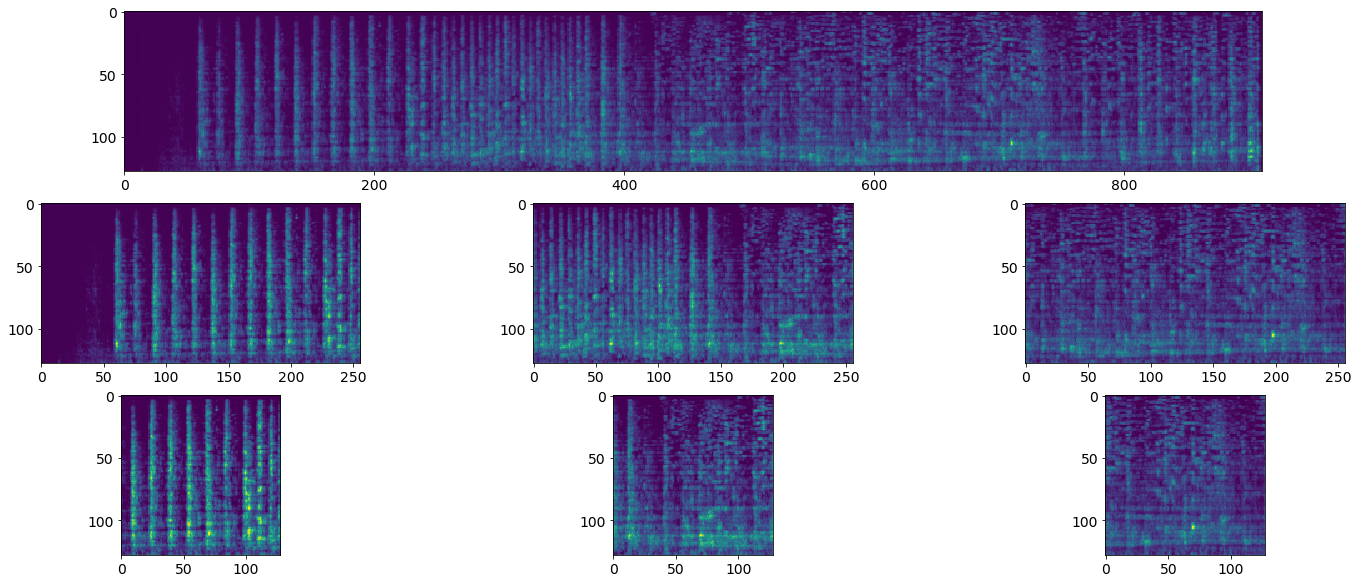

In [18]:
# TEST TO SHOW DIFFERENCE IN EXTRACTED CHUNKS
spec,fp = generate_spectrogram(testpath, 
                     hop_length = hop_length, 
                     sr = sr, 
                     window = window,
                     win_length = win_length, 
                     margin = margin)


test_full_spec = alter_image(spec)

testimages_v1 = extract_chunks(alter_image(spec))
testimages_v2 = extract_chunks_v2(alter_image(spec),128)

fig = plt.figure(figsize = (25,10))
gs = gridspec.GridSpec(3, 3)
plt.rcParams.update({'font.size': 14})

ax1 = fig.add_subplot(gs[0, 0:3])
ax1.imshow(test_full_spec)
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[2, 2])
axes1 = [ax2,ax3,ax4]
axes2 = [ax5,ax6,ax7]

for ind, img in enumerate(testimages_v1):
    axes1[ind].imshow(img)
    
for ind, img in enumerate(testimages_v2):
    axes2[ind].imshow(img)

In [64]:
train_folder2 = "spec_train2/"
test_folder2 = "spec_test2/"
#ratio = 1, extract 1k from both
Magna3_train2,Magna3_test2,Magna4_train2,Magna4_test2 = get_dataset_paths(Magna,1000,1)

Magna4 has 8763 usable data points
Magna3 has 1831 usable data points


In [65]:
print(len(Magna4_train2))
print(len(Magna4_test2))
print(len(Magna3_train2))
print(len(Magna3_test2))

900
100
900
100


In [66]:
convert_paths_to_spec_v2(Magna3_test2,test_folder2,3)
convert_paths_to_spec_v2(Magna4_test2,test_folder2,4)

convert_paths_to_spec_v2(Magna3_train2,train_folder2,3)
convert_paths_to_spec_v2(Magna4_train2,train_folder2,4)

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/shira_kammen-music_of_waters-02-downstream-320-349.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/shira_kammen-music_of_waters-02-downstream-320-349_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/shira_kammen-music_of_waters-02-downstream-320-349_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/shira_kammen-music_of_waters-02-downstream-320-349_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/myles_cochran-marginal_street-08-something_pretty-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/myles_cochran-marginal_street-08-something_pretty-59-88_p0.

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/8/mediva-viva_mediva-03-ivo_bene_anon_c14th_italy-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/mediva-viva_mediva-03-ivo_bene_anon_c14th_italy-204-233_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/mediva-viva_mediva-03-ivo_bene_anon_c14th_italy-204-233_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/mediva-viva_mediva-03-ivo_bene_anon_c14th_italy-204-233_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/8/skitzo-hellavator_musick-07-kill_with_a_vengeance_live-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/skitzo-hellavator_musick-07-kill

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/gerard_satamian-dry_fig_trees-05-chansons_sans_paroles_1989_op__2_berceuse-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/gerard_satamian-dry_fig_trees-05-chansons_sans_paroles_1989_op__2_berceuse-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/gerard_satamian-dry_fig_trees-05-chansons_sans_paroles_1989_op__2_berceuse-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/gerard_satamian-dry_fig_trees-05-chansons_sans_paroles_1989_op__2_berceuse-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/philharmonia_baroque_orchestra-handel__atalanta_cd2-10-recitativo_edalla_man_di_tirsi-0-29.mp3.xml extracted
Img saved

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/magnatune_compilation-new_age_and_jazz-11-michael_masley_soliel-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/magnatune_compilation-new_age_and_jazz-11-michael_masley_soliel-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/magnatune_compilation-new_age_and_jazz-11-michael_masley_soliel-117-146_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/magnatune_compilation-new_age_and_jazz-11-michael_masley_soliel-117-146_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/swar_prabhat-designer_bliss-07-vedasarshivastava-378-407.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/M

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/kyiv_chamber_choir-masterpieces_of_the_ukrainian_choral_baroque-03-do_not_forsake_me-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/kyiv_chamber_choir-masterpieces_of_the_ukrainian_choral_baroque-03-do_not_forsake_me-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/kyiv_chamber_choir-masterpieces_of_the_ukrainian_choral_baroque-03-do_not_forsake_me-88-117_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/kyiv_chamber_choir-masterpieces_of_the_ukrainian_choral_baroque-03-do_not_forsake_me-88-117_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/0/american_bach_soloists-j_s__bach__cantatas_volume_v-01-gleichwie_der_regen

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/solar_cycle-sunlight-12-ray_of_life-320-349.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/solar_cycle-sunlight-12-ray_of_life-320-349_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/solar_cycle-sunlight-12-ray_of_life-320-349_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/solar_cycle-sunlight-12-ray_of_life-320-349_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/curl-ultimate_station-06-hypnotic-262-291.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/curl-ultimate_station-06-hypnotic-262-291_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearnin

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/atomic_opera-penguin_dust-02-stoptherain-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/atomic_opera-penguin_dust-02-stoptherain-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/atomic_opera-penguin_dust-02-stoptherain-88-117_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/atomic_opera-penguin_dust-02-stoptherain-88-117_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/norine_braun-now_and_zen-01-jade-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/norine_braun-now_and_zen-01-jade-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/Mach

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/2/version-versions-03-solaire-523-552.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/version-versions-03-solaire-523-552_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/version-versions-03-solaire-523-552_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/version-versions-03-solaire-523-552_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/american_bach_soloists-j_s__bach__mass_in_b_minor_cd2-07-et_in_spiritum_sanctum_dominum-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/american_bach_soloists-j_s__bach__mass_in_b_minor_cd2-07-et_in_spiritum_sanctum_d

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/seth_carlin-schubert__works_for_solo_fortepiano-04-sonata_in_eflat_major_opus_posth__122__allegro_moderato-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/seth_carlin-schubert__works_for_solo_fortepiano-04-sonata_in_eflat_major_opus_posth__122__allegro_moderato-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/seth_carlin-schubert__works_for_solo_fortepiano-04-sonata_in_eflat_major_opus_posth__122__allegro_moderato-146-175_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/3/seth_carlin-schubert__works_for_solo_fortepiano-04-sonata_in_eflat_major_opus_posth__122__allegro_moderato-146-175_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATun

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/trancevision-lemuria-08-lemuria-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/trancevision-lemuria-08-lemuria-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/trancevision-lemuria-08-lemuria-88-117_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/trancevision-lemuria-08-lemuria-88-117_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/skitzo-heavy_shit-01-curse_of_the_phoenix-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/skitzo-heavy_shit-01-curse_of_the_phoenix-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Cl

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/rocket_city_riot-pop_killer-02-down_with_her-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/rocket_city_riot-pop_killer-02-down_with_her-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/rocket_city_riot-pop_killer-02-down_with_her-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/rocket_city_riot-pop_killer-02-down_with_her-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/touchinggrace-happenstance-09-southern_sultry-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/touchinggrace-happenstance-09-southern_sultry-146-175_p0.png


imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/sibelian-the_soul_rush-06-heartshine-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/sibelian-the_soul_rush-06-heartshine-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/sibelian-the_soul_rush-06-heartshine-117-146_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/sibelian-the_soul_rush-06-heartshine-117-146_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/zilla-egg-12-lucky_foot-349-378.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/zilla-egg-12-lucky_foot-349-378_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/william_brooks-silent_wings-08-i_will_stop_with_you-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/william_brooks-silent_wings-08-i_will_stop_with_you-204-233_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/william_brooks-silent_wings-08-i_will_stop_with_you-204-233_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/william_brooks-silent_wings-08-i_will_stop_with_you-204-233_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/2/version-versions-05-head_east-233-262.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/version-versions-05-head_east-233-262_p0.

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/lvx_nova-lvx_nova-06-ghanian_sunset-320-349.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/lvx_nova-lvx_nova-06-ghanian_sunset-320-349_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/lvx_nova-lvx_nova-06-ghanian_sunset-320-349_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/lvx_nova-lvx_nova-06-ghanian_sunset-320-349_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/8/ivilion-terean-03-urtulitreator-291-320.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/ivilion-terean-03-urtulitreator-291-320_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Cl

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/2/anup-embrace-09-life_interrupted-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/anup-embrace-09-life_interrupted-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/anup-embrace-09-life_interrupted-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/anup-embrace-09-life_interrupted-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/ensemble_mirable-triemer_six_cello_sonatas-07-sonata_2_allegroadagio-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/ensemble_mirable-triemer_six_cello_sonatas-07-sonata_2_allegroadagio-30-59_p0.png
Img sa

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/jay_kishor-amber-04-raga_malgunji__drut_teentaal-407-436.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/jay_kishor-amber-04-raga_malgunji__drut_teentaal-407-436_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/jay_kishor-amber-04-raga_malgunji__drut_teentaal-407-436_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/jay_kishor-amber-04-raga_malgunji__drut_teentaal-407-436_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/8/burning_babylon-knives_to_the_treble-08-satta_stylee-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/burning_babylon-knives_to_the_t

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/justin_bianco-finality-05-wings_of_fire-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/justin_bianco-finality-05-wings_of_fire-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/justin_bianco-finality-05-wings_of_fire-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/justin_bianco-finality-05-wings_of_fire-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/aba_structure-epic-03-houseboats-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_test2/4/aba_structure-epic-03-houseboats-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineL

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/seismic_anamoly-afterburner-07-ten_million_tears-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/seismic_anamoly-afterburner-07-ten_million_tears-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/seismic_anamoly-afterburner-07-ten_million_tears-117-146_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/seismic_anamoly-afterburner-07-ten_million_tears-117-146_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/philharmonia_baroque-beethoven_symphonies_no_3_eroica_and_no_8-03-eroica_3rd_and_4th-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_tra

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/etherine-gleam-06-leaving_ground-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/etherine-gleam-06-leaving_ground-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/etherine-gleam-06-leaving_ground-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/etherine-gleam-06-leaving_ground-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/kyiv_chamber_choir-masterpieces_of_the_ukrainian_choral_baroque-11-o_lord_thou_are_my_only_hope-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/kyiv_chamber_choir-masterpieces_of_the_ukrainian_choral_

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/seth_and_maryse_carlin-schubert__music_for_fortepiano_four_hands-03-sonata_in_c_major_grand_duo__scherzo__allegro_vivace-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/seth_and_maryse_carlin-schubert__music_for_fortepiano_four_hands-03-sonata_in_c_major_grand_duo__scherzo__allegro_vivace-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/seth_and_maryse_carlin-schubert__music_for_fortepiano_four_hands-03-sonata_in_c_major_grand_duo__scherzo__allegro_vivace-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/seth_and_maryse_carlin-schubert__music_for_fortepiano_four_hands-03-sonata_in_c_major_grand_duo__scherzo__allegro_vivace-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/Machi

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/richard_savino-legrenzi__venice_before_vivaldi-06-sonata_la_forni-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/richard_savino-legrenzi__venice_before_vivaldi-06-sonata_la_forni-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/richard_savino-legrenzi__venice_before_vivaldi-06-sonata_la_forni-146-175_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/richard_savino-legrenzi__venice_before_vivaldi-06-sonata_la_forni-146-175_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/katherine_roberts_perl-j_s__bach_french_suites-09-suite_no_2_in_c_minor_bwv_813_courante-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desk

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/william_brooks-silent_wings-10-whose_moon-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/william_brooks-silent_wings-10-whose_moon-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/william_brooks-silent_wings-10-whose_moon-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/william_brooks-silent_wings-10-whose_moon-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/2/aba_structure-tektonik_illusion-02-illusion-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/aba_structure-tektonik_illusion-02-illusion-59-88_p0.png
Img save

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/american_bach_soloists-j_s__bach__favorite_cantatas-10-recitative__ach_ich_bin_ein_kind_der_sunden-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/american_bach_soloists-j_s__bach__favorite_cantatas-10-recitative__ach_ich_bin_ein_kind_der_sunden-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/american_bach_soloists-j_s__bach__favorite_cantatas-10-recitative__ach_ich_bin_ein_kind_der_sunden-88-117_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/american_bach_soloists-j_s__bach__favorite_cantatas-10-recitative__ach_ich_bin_ein_kind_der_sunden-88-117_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/utopia_banished

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/vito_paternoster-inzaffirio-07-preludio_iv-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/vito_paternoster-inzaffirio-07-preludio_iv-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/vito_paternoster-inzaffirio-07-preludio_iv-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/vito_paternoster-inzaffirio-07-preludio_iv-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/glen_bledsoe-up_and_down-09-rumination-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/glen_bledsoe-up_and_down-09-rumination-0-29_p0.png
Img saved! to /Users/ARN

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/kiev_seminary_choir-hymns_of_the_allnight_vigil-11-o_new_miracle-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/kiev_seminary_choir-hymns_of_the_allnight_vigil-11-o_new_miracle-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/kiev_seminary_choir-hymns_of_the_allnight_vigil-11-o_new_miracle-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/kiev_seminary_choir-hymns_of_the_allnight_vigil-11-o_new_miracle-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/2/burnshee_thornside-blues_and_misc-01-happy_blues-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagA

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/2/ensemble_mirable-conversations_galantes-09-sonata_v_in_f_major_ariagratioso-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/ensemble_mirable-conversations_galantes-09-sonata_v_in_f_major_ariagratioso-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/ensemble_mirable-conversations_galantes-09-sonata_v_in_f_major_ariagratioso-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/ensemble_mirable-conversations_galantes-09-sonata_v_in_f_major_ariagratioso-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/professor_armchair-too_much_mustard-01-a_signal_from_mars-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/jacob_heringman-holburns_passion-21-queenes_galliard_cittern_with_a_bass-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jacob_heringman-holburns_passion-21-queenes_galliard_cittern_with_a_bass-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jacob_heringman-holburns_passion-21-queenes_galliard_cittern_with_a_bass-88-117_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jacob_heringman-holburns_passion-21-queenes_galliard_cittern_with_a_bass-88-117_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/altri_stromenti-uccellini-08-la_ciaccona_uccellini-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/Machi

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/dac_crowell-redshifted_harmonies-02-prinsengracht_extensions-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/dac_crowell-redshifted_harmonies-02-prinsengracht_extensions-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/dac_crowell-redshifted_harmonies-02-prinsengracht_extensions-146-175_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/dac_crowell-redshifted_harmonies-02-prinsengracht_extensions-146-175_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/doc_rossi-demarzi6_sonatas_for_cetra_o_kitara-20-sonata_v_minuet-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/data

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/richard_savino-mertz__bardic_sounds-06-to_my_distant_one-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/richard_savino-mertz__bardic_sounds-06-to_my_distant_one-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/richard_savino-mertz__bardic_sounds-06-to_my_distant_one-88-117_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/richard_savino-mertz__bardic_sounds-06-to_my_distant_one-88-117_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/richard_savino-legrenzi__venice_before_vivaldi-06-sonata_la_forni-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/reza_manzoori-restrung-01-union-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/reza_manzoori-restrung-01-union-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/reza_manzoori-restrung-01-union-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/reza_manzoori-restrung-01-union-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/william_brooks-karma_dogs-10-slacker_blues-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/william_brooks-karma_dogs-10-slacker_blues-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classi

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/lisa_debenedictis-mixter_one-02-structured_emotions_by_james_margetts-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/lisa_debenedictis-mixter_one-02-structured_emotions_by_james_margetts-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/lisa_debenedictis-mixter_one-02-structured_emotions_by_james_margetts-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/lisa_debenedictis-mixter_one-02-structured_emotions_by_james_margetts-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/janine_johnson-chopin_recital-12-valse_brilliante_op_18_in_eb_major-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Deskto

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/paul_avgerinos-phos_hilaron-01-humbly_i_adore_thee-233-262.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/paul_avgerinos-phos_hilaron-01-humbly_i_adore_thee-233-262_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/paul_avgerinos-phos_hilaron-01-humbly_i_adore_thee-233-262_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/paul_avgerinos-phos_hilaron-01-humbly_i_adore_thee-233-262_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/philharmonia_baroque_orchestra-handel__atalanta_cd1-20-coro_oggi_rimbombano_di_feste-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spe

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/hans_christian-surrender-03-shades_of_blue-436-465.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/hans_christian-surrender-03-shades_of_blue-436-465_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/hans_christian-surrender-03-shades_of_blue-436-465_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/hans_christian-surrender-03-shades_of_blue-436-465_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/philharmonia_baroque-beethoven_symphonies_no_3_eroica_and_no_8-01-eroica_1st-465-494.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/philharmonia_baroque-beeth

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/touchinggrace-submission-06-watching_clouds-291-320.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/touchinggrace-submission-06-watching_clouds-291-320_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/touchinggrace-submission-06-watching_clouds-291-320_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/touchinggrace-submission-06-watching_clouds-291-320_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/magnatune_compilation-high_energy_rock_and_roll-21-skitzo_prom_night-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/magnatune_compilation-high_energ

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/william_brooks-blue_ribbon__the_best_of_william_brooks-12-the_hanging_of_allen_scott_johnson-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/william_brooks-blue_ribbon__the_best_of_william_brooks-12-the_hanging_of_allen_scott_johnson-204-233_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/william_brooks-blue_ribbon__the_best_of_william_brooks-12-the_hanging_of_allen_scott_johnson-204-233_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/william_brooks-blue_ribbon__the_best_of_william_brooks-12-the_hanging_of_allen_scott_johnson-204-233_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/john_fleagle-worlds_bliss__medieval

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/doc_rossi-demarzi6_sonatas_for_cetra_o_kitara-18-sonata_v_largo-291-320.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/doc_rossi-demarzi6_sonatas_for_cetra_o_kitara-18-sonata_v_largo-291-320_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/doc_rossi-demarzi6_sonatas_for_cetra_o_kitara-18-sonata_v_largo-291-320_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/doc_rossi-demarzi6_sonatas_for_cetra_o_kitara-18-sonata_v_largo-291-320_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/rapoon-fallen_gods-08-dusk_red_walls-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagAT

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/artemis-gravity-01-sync_or_swim-291-320.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/artemis-gravity-01-sync_or_swim-291-320_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/artemis-gravity-01-sync_or_swim-291-320_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/artemis-gravity-01-sync_or_swim-291-320_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/etherine-24_days-02-i_remembered-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/etherine-24_days-02-i_remembered-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Pr

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/2/shira_kammen-the_almanac-03-mirie_it_is-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/shira_kammen-the_almanac-03-mirie_it_is-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/shira_kammen-the_almanac-03-mirie_it_is-117-146_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/shira_kammen-the_almanac-03-mirie_it_is-117-146_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/0/beth_quist-silver-03-monsters-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/beth_quist-silver-03-monsters-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/Machin

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/jay_kishor-the_color_of_night-03-shivranjani-813-842.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jay_kishor-the_color_of_night-03-shivranjani-813-842_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jay_kishor-the_color_of_night-03-shivranjani-813-842_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jay_kishor-the_color_of_night-03-shivranjani-813-842_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/john_williams-long_ride_home-06-nothing_lost-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/john_williams-long_ride_home-06-nothing_lost-0-29_p0.

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/asteria-soyes_loyal-15-jamais_tante_lute_gilles_binchois-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/asteria-soyes_loyal-15-jamais_tante_lute_gilles_binchois-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/asteria-soyes_loyal-15-jamais_tante_lute_gilles_binchois-88-117_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/asteria-soyes_loyal-15-jamais_tante_lute_gilles_binchois-88-117_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/jade_leary-and_come_the_sirens-06-forgotten-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jade_leary

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/atomic_opera-alpha_and_oranges-06-love_in_grey-291-320.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/atomic_opera-alpha_and_oranges-06-love_in_grey-291-320_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/atomic_opera-alpha_and_oranges-06-love_in_grey-291-320_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/atomic_opera-alpha_and_oranges-06-love_in_grey-291-320_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/edward_martin-art_of_the_lute_in_renaissance_france-10-guillarde_milanoise_morlaye-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/edward

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/william_brooks-fowl_mouth-06-hideaway-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/william_brooks-fowl_mouth-06-hideaway-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/william_brooks-fowl_mouth-06-hideaway-88-117_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/william_brooks-fowl_mouth-06-hideaway-88-117_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/curandero-curandero-11-adios-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/curandero-curandero-11-adios-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Clas

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/domased-selection-11-he_is_leaving_us_blue_m_rmx-436-465.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/domased-selection-11-he_is_leaving_us_blue_m_rmx-436-465_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/domased-selection-11-he_is_leaving_us_blue_m_rmx-436-465_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/domased-selection-11-he_is_leaving_us_blue_m_rmx-436-465_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/james_edwards-le_tresor_dorphee_by_antoine_francisque-02-branle_gay_troisiesme-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/ja

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/rapoon-fallen_gods-03-fallen_gods-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/rapoon-fallen_gods-03-fallen_gods-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/rapoon-fallen_gods-03-fallen_gods-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/rapoon-fallen_gods-03-fallen_gods-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/mercy_machine-in_your_bed__instrumental_mix-08-befangen_instrumental_mix-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/mercy_machine-in_your_bed__instrumental_mix-08-befangen_instrumental_mix-59-

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/solace-the_gathering_season-06-qabil-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/solace-the_gathering_season-06-qabil-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/solace-the_gathering_season-06-qabil-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/solace-the_gathering_season-06-qabil-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/rapoon-what_do_you_suppose-01-before_i_begin-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/rapoon-what_do_you_suppose-01-before_i_begin-175-204_p0.png
Img saved! to /Users/ARNAV/Des

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/american_baroque-mozart_4_quartets_for_strings_and_winds-06-flute_quartet_in_c_k285b__allegro-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/american_baroque-mozart_4_quartets_for_strings_and_winds-06-flute_quartet_in_c_k285b__allegro-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/american_baroque-mozart_4_quartets_for_strings_and_winds-06-flute_quartet_in_c_k285b__allegro-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/american_baroque-mozart_4_quartets_for_strings_and_winds-06-flute_quartet_in_c_k285b__allegro-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/shira_kammen-music_of_waters-04-the_water_i

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/aba_structure-epic-07-erased-697-726.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/aba_structure-epic-07-erased-697-726_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/aba_structure-epic-07-erased-697-726_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/aba_structure-epic-07-erased-697-726_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/kiev_theological_academy_and_seminary_choir-traditional_worship_singing_of_kievpechersk_lavra-13-come_let_us_worship-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/kiev_theological_academy_and_seminary_choir-t

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/da_camera-a_celtic_celebration-08-the_irish_ground_tollett-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/da_camera-a_celtic_celebration-08-the_irish_ground_tollett-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/da_camera-a_celtic_celebration-08-the_irish_ground_tollett-88-117_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/da_camera-a_celtic_celebration-08-the_irish_ground_tollett-88-117_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/phebe_craig_and_katherine_westine-beside_themselves-05-soler_conceierto_ii_in_a_minor_allegro-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Cla

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/tim_rayborn-qadim-01-laylat__oud_turkish-291-320.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/tim_rayborn-qadim-01-laylat__oud_turkish-291-320_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/tim_rayborn-qadim-01-laylat__oud_turkish-291-320_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/tim_rayborn-qadim-01-laylat__oud_turkish-291-320_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/rapoon-easterly_6_or_7-04-all_criminals-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/rapoon-easterly_6_or_7-04-all_criminals-175-204_p0.png
Img saved! to /U

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/etherine-gleam-06-leaving_ground-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/etherine-gleam-06-leaving_ground-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/etherine-gleam-06-leaving_ground-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/etherine-gleam-06-leaving_ground-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/jacob_heringman-jane_pickeringes_lute_book-13-an_allemande-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jacob_heringman-jane_pickeringes_lute_book-13-an_allemande-0-29_p0.png
Img saved! to /U

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/rapoon-easterly_6_or_7-07-6_or_7-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/rapoon-easterly_6_or_7-07-6_or_7-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/rapoon-easterly_6_or_7-07-6_or_7-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/rapoon-easterly_6_or_7-07-6_or_7-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/dac_crowell-spctr-01-spctr-668-697.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/dac_crowell-spctr-01-spctr-668-697_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTag

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/0/apa_ya-apa_ya-09-india_electrique-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/apa_ya-apa_ya-09-india_electrique-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/apa_ya-apa_ya-09-india_electrique-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/apa_ya-apa_ya-09-india_electrique-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/jami_sieber-hidden_sky-09-hidden_sky-262-291.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jami_sieber-hidden_sky-09-hidden_sky-262-291_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Clas

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/tim_rayborn-ashek-04-panayir-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/tim_rayborn-ashek-04-panayir-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/tim_rayborn-ashek-04-panayir-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/tim_rayborn-ashek-04-panayir-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/dac_crowell-the_sea_and_the_sky-02-umi_no_kami_ni_kansha-349-378.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/dac_crowell-the_sea_and_the_sky-02-umi_no_kami_ni_kansha-349-378_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/vito_paternoster-cd1bach_sonatas_and_partitas_for_solo_violin-16-sonata_seconda_in_re_minore__allegro-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/vito_paternoster-cd1bach_sonatas_and_partitas_for_solo_violin-16-sonata_seconda_in_re_minore__allegro-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/vito_paternoster-cd1bach_sonatas_and_partitas_for_solo_violin-16-sonata_seconda_in_re_minore__allegro-117-146_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/vito_paternoster-cd1bach_sonatas_and_partitas_for_solo_violin-16-sonata_seconda_in_re_minore__allegro-117-146_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/plunkett-14_days-13-14_days-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/plunkett-14_days-13-14_days-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/plunkett-14_days-13-14_days-117-146_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/plunkett-14_days-13-14_days-117-146_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/mutandina-mutandina-05-eso-233-262.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/mutandina-mutandina-05-eso-233-262_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/sp

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/the_strap_ons-geeking_crime-22-anarchy_life-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/the_strap_ons-geeking_crime-22-anarchy_life-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/the_strap_ons-geeking_crime-22-anarchy_life-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/the_strap_ons-geeking_crime-22-anarchy_life-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/jade_leary-fossildawn-03-born_of_a_silent_sun-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jade_leary-fossildawn-03-born_of_a_silent_sun-59-88_p0.png
Img 

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/2/shira_kammen-the_almanac-18-quant_je_vois_yver_retorner-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/shira_kammen-the_almanac-18-quant_je_vois_yver_retorner-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/shira_kammen-the_almanac-18-quant_je_vois_yver_retorner-117-146_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/shira_kammen-the_almanac-18-quant_je_vois_yver_retorner-117-146_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/janine_johnson-chopin_recital-12-valse_brilliante_op_18_in_eb_major-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATu

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/rob_costlow-woods_of_chaos-08-not_alone-233-262.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/rob_costlow-woods_of_chaos-08-not_alone-233-262_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/rob_costlow-woods_of_chaos-08-not_alone-233-262_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/rob_costlow-woods_of_chaos-08-not_alone-233-262_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/solace-the_gathering_season-05-aenaem-233-262.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/solace-the_gathering_season-05-aenaem-233-262_p0.png
Img saved! to /Users/ARN

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/stargarden-ambient_excursions-06-chenrezig-378-407.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/stargarden-ambient_excursions-06-chenrezig-378-407_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/stargarden-ambient_excursions-06-chenrezig-378-407_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/stargarden-ambient_excursions-06-chenrezig-378-407_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/cheryl_ann_fulton-the_airs_of_wales-07-the_dimpled_cheek-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/cheryl_ann_fulton-the_airs_of_wales-07-the_dim

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/8/jacob_heringman-blame_not_my_lute-39-tiente_alora-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jacob_heringman-blame_not_my_lute-39-tiente_alora-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jacob_heringman-blame_not_my_lute-39-tiente_alora-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jacob_heringman-blame_not_my_lute-39-tiente_alora-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/2/roots_of_rebellion-surfacing-08-so_far_away-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/roots_of_rebellion-surfacing-08-so_far_away

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/solace-the_gathering_season-12-journeys_end-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/solace-the_gathering_season-12-journeys_end-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/solace-the_gathering_season-12-journeys_end-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/solace-the_gathering_season-12-journeys_end-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/new_york_consort_of_viols-dances_and_canzonas_of_holborne_and_brade-02-des_rothschencken_tanz_brade-262-291.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/new_yor

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/8/philharmonia_baroque-cd2_scarlatti__cecilian_vespers-12-magnificat__magnificat-233-262.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/philharmonia_baroque-cd2_scarlatti__cecilian_vespers-12-magnificat__magnificat-233-262_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/philharmonia_baroque-cd2_scarlatti__cecilian_vespers-12-magnificat__magnificat-233-262_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/philharmonia_baroque-cd2_scarlatti__cecilian_vespers-12-magnificat__magnificat-233-262_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/american_baroque-mozart_4_quartets_for_strings_and_winds-08-oboe_quartet_in_f_after_k496__a

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/8/burning_babylon-knives_to_the_treble-05-mash_up_the_dj-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/burning_babylon-knives_to_the_treble-05-mash_up_the_dj-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/burning_babylon-knives_to_the_treble-05-mash_up_the_dj-117-146_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/burning_babylon-knives_to_the_treble-05-mash_up_the_dj-117-146_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/jacob_heringman-holburns_passion-12-galliard_the_fairyrownde_lute-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_t

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/rapoon-vernal_crossing-07-anatapurrah-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/rapoon-vernal_crossing-07-anatapurrah-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/rapoon-vernal_crossing-07-anatapurrah-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/rapoon-vernal_crossing-07-anatapurrah-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/paul_berget-j_s__bach_on_the_lute-11-menuets_1_and_2_bwv_1007-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/paul_berget-j_s__bach_on_the_lute-11-menuets_1_and_2_bwv_1007-0-

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/swar_prabhat-designer_bliss-02-saraswati_vandana-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/swar_prabhat-designer_bliss-02-saraswati_vandana-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/swar_prabhat-designer_bliss-02-saraswati_vandana-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/swar_prabhat-designer_bliss-02-saraswati_vandana-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/0/rocket_city_riot-last_of_the_pleasure_seekers-12-cut_me_out-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/rocket_city_riot-last_

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/rob_costlow-woods_of_chaos-03-semester_days-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/rob_costlow-woods_of_chaos-03-semester_days-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/rob_costlow-woods_of_chaos-03-semester_days-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/rob_costlow-woods_of_chaos-03-semester_days-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/elizabeth_wolff-moments_musicaux-08-moritz_moszkowski__3_moments_musicaux_op__7__con_moto-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/elizabeth

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/orinda-airs_de_cour-06-cesses_mortels_de_soupirer_pierre_guedron-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/orinda-airs_de_cour-06-cesses_mortels_de_soupirer_pierre_guedron-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/orinda-airs_de_cour-06-cesses_mortels_de_soupirer_pierre_guedron-146-175_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/orinda-airs_de_cour-06-cesses_mortels_de_soupirer_pierre_guedron-146-175_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/rapoon-cidar-01-refraction-349-378.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/sp

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/curandero-aras-06-aras-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/curandero-aras-06-aras-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/curandero-aras-06-aras-88-117_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/curandero-aras-06-aras-88-117_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/daniel_ben_pienaar-book_2_cd1_welltempered_clavier-21-prelude_and_fugue_no__11_in_f_major_bwv_880_praeludium-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/daniel_ben_pienaar-book_2_cd1_welltempered_clavier-21-prelude_and_fugue_no__11_i

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/8/mediva-viva_mediva-03-ivo_bene_anon_c14th_italy-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/mediva-viva_mediva-03-ivo_bene_anon_c14th_italy-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/mediva-viva_mediva-03-ivo_bene_anon_c14th_italy-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/mediva-viva_mediva-03-ivo_bene_anon_c14th_italy-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/vito_paternoster-cd1bach_sonatas_and_partitas_for_solo_violin-16-sonata_seconda_in_re_minore__allegro-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagA

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/solace-balance-08-miss_anime-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/solace-balance-08-miss_anime-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/solace-balance-08-miss_anime-146-175_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/solace-balance-08-miss_anime-146-175_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/glen_bledsoe-octopants-11-und_so_weiter_i-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/glen_bledsoe-octopants-11-und_so_weiter_i-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classi

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/jay_kishor-cd2_the_sowebo_concert-01-raga_malkauns-3278-3307.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jay_kishor-cd2_the_sowebo_concert-01-raga_malkauns-3278-3307_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jay_kishor-cd2_the_sowebo_concert-01-raga_malkauns-3278-3307_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jay_kishor-cd2_the_sowebo_concert-01-raga_malkauns-3278-3307_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/0/daniel_ben_pienaar-book_2_cd2_welltempered_clavier-17-prelude_and_fugue_no__21_in_bflat_major_bwv_890_praeludium-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Clas

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/jeff_wahl-guinevere-06-before_i_knew-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jeff_wahl-guinevere-06-before_i_knew-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jeff_wahl-guinevere-06-before_i_knew-146-175_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jeff_wahl-guinevere-06-before_i_knew-146-175_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/8/stargarden-music_for_modern_listening-09-supasonic-233-262.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/stargarden-music_for_modern_listening-09-supasonic-233-262_p0.png
Img saved!

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/monoide-zeitpunkt-06-zara-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/monoide-zeitpunkt-06-zara-204-233_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/monoide-zeitpunkt-06-zara-204-233_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/monoide-zeitpunkt-06-zara-204-233_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/dac_crowell-within_this_space-03-cantillation-929-958.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/dac_crowell-within_this_space-03-cantillation-929-958_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/tilopa-turkishauch-03-avanti-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/tilopa-turkishauch-03-avanti-204-233_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/tilopa-turkishauch-03-avanti-204-233_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/tilopa-turkishauch-03-avanti-204-233_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/mr_gelatine-electroluv-08-they_are_coming-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/mr_gelatine-electroluv-08-they_are_coming-204-233_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classi

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/2/magnatune_compilation-electronica-08-joram_solipsism-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/magnatune_compilation-electronica-08-joram_solipsism-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/magnatune_compilation-electronica-08-joram_solipsism-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/magnatune_compilation-electronica-08-joram_solipsism-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/shane_jackman-equilibrium-07-driftwood_fire-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/shane_jackman-equilibrium-07-drif

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/artemis-orbits-12-angel_angelic_mix__daniel_berkman-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/artemis-orbits-12-angel_angelic_mix__daniel_berkman-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/artemis-orbits-12-angel_angelic_mix__daniel_berkman-88-117_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/artemis-orbits-12-angel_angelic_mix__daniel_berkman-88-117_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/steven_devine-portrait_of_an_english_harpsichord-21-suite_no_5_in_e_major_allemande_george_frederick_handel-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/da

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/drevo-christian_themes_in_ukrainian_folk_songs-16-what_wonderful_news-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/drevo-christian_themes_in_ukrainian_folk_songs-16-what_wonderful_news-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/drevo-christian_themes_in_ukrainian_folk_songs-16-what_wonderful_news-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/drevo-christian_themes_in_ukrainian_folk_songs-16-what_wonderful_news-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/hands_upon_black_earth-hands_upon_black_earth-09-lastime-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearnin

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/philharmonia_baroque-rameau_and_leclair-03-entree_tres_gaye_des_troubadours__air_tres_gay__gavotte__menuet_rameau_les_paladins-262-291.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/philharmonia_baroque-rameau_and_leclair-03-entree_tres_gaye_des_troubadours__air_tres_gay__gavotte__menuet_rameau_les_paladins-262-291_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/philharmonia_baroque-rameau_and_leclair-03-entree_tres_gaye_des_troubadours__air_tres_gay__gavotte__menuet_rameau_les_paladins-262-291_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/philharmonia_baroque-rameau_and_leclair-03-entree_tres_gaye_des_troubadours__air_tres_gay__gavotte__menuet_rameau_les_paladins-262-291_p2.png
i

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/hans_christian-surrender-03-shades_of_blue-523-552.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/hans_christian-surrender-03-shades_of_blue-523-552_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/hans_christian-surrender-03-shades_of_blue-523-552_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/hans_christian-surrender-03-shades_of_blue-523-552_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/touchinggrace-happenstance-10-afternoon_lament-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/touchinggrace-happenstance-10-afternoon_lament-30-59_p0.pn

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/jacob_heringman-jane_pickeringes_lute_book-11-mall_symes-262-291.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jacob_heringman-jane_pickeringes_lute_book-11-mall_symes-262-291_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jacob_heringman-jane_pickeringes_lute_book-11-mall_symes-262-291_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jacob_heringman-jane_pickeringes_lute_book-11-mall_symes-262-291_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/philharmonia_baroque-rameau_and_leclair-01-overture_tres_vite__menuet_lent__air_gay_rameau_les_paladins-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearni

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/drop_trio-cezanne-10-robot_suit_i-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/drop_trio-cezanne-10-robot_suit_i-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/drop_trio-cezanne-10-robot_suit_i-146-175_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/drop_trio-cezanne-10-robot_suit_i-146-175_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/drevo-christian_themes_in_ukrainian_folk_songs-18-ah_in_the_field_in_the_field_goes_buzz-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/drevo-christian_themes_in_ukrainian_folk_songs-18-a

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/janine_johnson-j_s__bach_works_for_harpsichord-11-english_suite_no_3_in_g_minor__allemande-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/janine_johnson-j_s__bach_works_for_harpsichord-11-english_suite_no_3_in_g_minor__allemande-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/janine_johnson-j_s__bach_works_for_harpsichord-11-english_suite_no_3_in_g_minor__allemande-117-146_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/janine_johnson-j_s__bach_works_for_harpsichord-11-english_suite_no_3_in_g_minor__allemande-117-146_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/2/stellamara-star_of_the_sea-09-oj_jabuko-233

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/jamie_janover_and_michael_masley-all_strings_considered-02-birds_of_mindrise-378-407.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jamie_janover_and_michael_masley-all_strings_considered-02-birds_of_mindrise-378-407_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jamie_janover_and_michael_masley-all_strings_considered-02-birds_of_mindrise-378-407_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jamie_janover_and_michael_masley-all_strings_considered-02-birds_of_mindrise-378-407_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/tom_paul-i_was_king-01-its_an_easy_life-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Deskto

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/tilopa-by_the_way-05-by_the_ganges-349-378.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/tilopa-by_the_way-05-by_the_ganges-349-378_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/tilopa-by_the_way-05-by_the_ganges-349-378_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/tilopa-by_the_way-05-by_the_ganges-349-378_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/rapoon-easterly_6_or_7-06-falling_more_slowly-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/rapoon-easterly_6_or_7-06-falling_more_slowly-88-117_p0.png
Img saved! to /Users/ARNAV/Des

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/cheryl_ann_fulton-the_once_and_future_harp-07-lamento_di_tristano_and_la_rotta-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/cheryl_ann_fulton-the_once_and_future_harp-07-lamento_di_tristano_and_la_rotta-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/cheryl_ann_fulton-the_once_and_future_harp-07-lamento_di_tristano_and_la_rotta-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/cheryl_ann_fulton-the_once_and_future_harp-07-lamento_di_tristano_and_la_rotta-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/katherine_roberts_perl-j_s__bach_french_suites-07-suite_no_4_in_e_flat_major_bwv_815_gigue-117-146.mp3.

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/paul_avgerinos-balancing_spheres-01-night_illusions__the_longing-900-929.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/paul_avgerinos-balancing_spheres-01-night_illusions__the_longing-900-929_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/paul_avgerinos-balancing_spheres-01-night_illusions__the_longing-900-929_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/paul_avgerinos-balancing_spheres-01-night_illusions__the_longing-900-929_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/cheryl_ann_fulton-the_once_and_future_harp-02-the_poet-349-378.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Pr

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/jeni_melia-the_last_of_old_england-11-with_my_love_my_life_was_nestled_morley-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jeni_melia-the_last_of_old_england-11-with_my_love_my_life_was_nestled_morley-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jeni_melia-the_last_of_old_england-11-with_my_love_my_life_was_nestled_morley-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jeni_melia-the_last_of_old_england-11-with_my_love_my_life_was_nestled_morley-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/new_york_consort_of_viols-dances_and_canzonas_of_holborne_and_brade-02-des_rothschencken_tanz_brade-407

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/solace-shawaza-02-kedar-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/solace-shawaza-02-kedar-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/solace-shawaza-02-kedar-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/solace-shawaza-02-kedar-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/beatundercontrol-the_introduction-05-speechless-291-320.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/beatundercontrol-the_introduction-05-speechless-291-320_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/dataset

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/musica_franca-corrette__le_phenix__les_delices_de_la_solitude-14-sonata_iv_in_bflat_major__corrente-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/musica_franca-corrette__le_phenix__les_delices_de_la_solitude-14-sonata_iv_in_bflat_major__corrente-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/musica_franca-corrette__le_phenix__les_delices_de_la_solitude-14-sonata_iv_in_bflat_major__corrente-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/musica_franca-corrette__le_phenix__les_delices_de_la_solitude-14-sonata_iv_in_bflat_major__corrente-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/tim_rayborn-ash

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/philharmonia_baroque-rameau_and_leclair-01-overture_tres_vite__menuet_lent__air_gay_rameau_les_paladins-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/philharmonia_baroque-rameau_and_leclair-01-overture_tres_vite__menuet_lent__air_gay_rameau_les_paladins-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/philharmonia_baroque-rameau_and_leclair-01-overture_tres_vite__menuet_lent__air_gay_rameau_les_paladins-146-175_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/philharmonia_baroque-rameau_and_leclair-01-overture_tres_vite__menuet_lent__air_gay_rameau_les_paladins-146-175_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_seg

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/artemis-undone-03-supernatural-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/artemis-undone-03-supernatural-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/artemis-undone-03-supernatural-117-146_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/artemis-undone-03-supernatural-117-146_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/jeff_wahl-guitarscapes-02-guinevere-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/jeff_wahl-guitarscapes-02-guinevere-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/d

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/altri_stromenti-uccellini-12-la_leona_uccellini-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/altri_stromenti-uccellini-12-la_leona_uccellini-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/altri_stromenti-uccellini-12-la_leona_uccellini-117-146_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/altri_stromenti-uccellini-12-la_leona_uccellini-117-146_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/drevo-christian_themes_in_ukrainian_folk_songs-11-in_the_honoured_lords_yard-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/3/drevo-chr

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/liquid_zen-magic_midsummer-11-orange_silhouette-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/liquid_zen-magic_midsummer-11-orange_silhouette-204-233_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/liquid_zen-magic_midsummer-11-orange_silhouette-204-233_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/liquid_zen-magic_midsummer-11-orange_silhouette-204-233_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/dj_cary-downtempo_chill-06-breathing_shiva_in_exile-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/dj_cary-downtempo_chill-06-brea

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/strojovna_07-switch_on__switch_off-02-deluxe-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/strojovna_07-switch_on__switch_off-02-deluxe-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/strojovna_07-switch_on__switch_off-02-deluxe-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/strojovna_07-switch_on__switch_off-02-deluxe-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/magnatune_compilation-new_age_and_jazz-12-trip_wamsley_finally-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/magnatune_compilation-new_age_and_j

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/jade_leary-fossildawn-01-summer82-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/jade_leary-fossildawn-01-summer82-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/jade_leary-fossildawn-01-summer82-117-146_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/jade_leary-fossildawn-01-summer82-117-146_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/kammen___swan-wild_wood-16-girls_night_out-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/kammen___swan-wild_wood-16-girls_night_out-204-233_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/human_response-delirious-01-delirious-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/human_response-delirious-01-delirious-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/human_response-delirious-01-delirious-146-175_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/human_response-delirious-01-delirious-146-175_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/indidginus-sine_language-03-myriad-233-262.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/indidginus-sine_language-03-myriad-233-262_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/processor-are_you_for_real-04-call_the_sheriff-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/processor-are_you_for_real-04-call_the_sheriff-204-233_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/processor-are_you_for_real-04-call_the_sheriff-204-233_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/processor-are_you_for_real-04-call_the_sheriff-204-233_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/arthur_yoria-ill_be_here_awake-09-sevilla-378-407.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/arthur_yoria-ill_be_here_awake-09-sevilla-378

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/thursday_group-uncle_mean-03-moroccan-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/thursday_group-uncle_mean-03-moroccan-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/thursday_group-uncle_mean-03-moroccan-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/thursday_group-uncle_mean-03-moroccan-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/seismic_anamoly-afterburner-05-skool_daze-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/seismic_anamoly-afterburner-05-skool_daze-204-233_p0.png
Img saved! to /Users/ARN

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/8/hybris-the_first_words-02-fateful_kind_of_rage-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/hybris-the_first_words-02-fateful_kind_of_rage-204-233_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/hybris-the_first_words-02-fateful_kind_of_rage-204-233_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/hybris-the_first_words-02-fateful_kind_of_rage-204-233_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/touchinggrace-the_reformation_sessions-02-taking_flight-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/touchinggrace-the_reformation_se

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/solar_cycle-sunlight-01-sunlight-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/solar_cycle-sunlight-01-sunlight-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/solar_cycle-sunlight-01-sunlight-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/solar_cycle-sunlight-01-sunlight-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/katherine_roberts_perl-j_s__bach_french_suites-16-suite_no_3_in_b_minor_bwv_814_sarabande-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/katherine_roberts_perl-j_s__bach_french_suites-16-suite_no_3_in_b_

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/mutandina-mutandina-01-juego-262-291.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/mutandina-mutandina-01-juego-262-291_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/mutandina-mutandina-01-juego-262-291_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/mutandina-mutandina-01-juego-262-291_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/justin_bianco-siren-12-parallel-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/justin_bianco-siren-12-parallel-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/Ma

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/solace-satya-08-sair_trip-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/solace-satya-08-sair_trip-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/solace-satya-08-sair_trip-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/solace-satya-08-sair_trip-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/mr_epic-sideways-01-down_low-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/mr_epic-sideways-01-down_low-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/8/skitzo-hellavator_musick-03-krystal_deaths_horizon-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/skitzo-hellavator_musick-03-krystal_deaths_horizon-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/skitzo-hellavator_musick-03-krystal_deaths_horizon-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/skitzo-hellavator_musick-03-krystal_deaths_horizon-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/dj_cary-eastern_grooves-02-kalimayantrahands_upon_black_earth-320-349.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/dj_cary-eastern_g

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/strojovna_07-dirnix-04-singularia-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/strojovna_07-dirnix-04-singularia-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/strojovna_07-dirnix-04-singularia-146-175_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/strojovna_07-dirnix-04-singularia-146-175_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/ehren_starks-lines_build_walls-09-one_big_hope-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/ehren_starks-lines_build_walls-09-one_big_hope-204-233_p0.png
Img saved! to /Users/ARNAV/Des

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/0/rocket_city_riot-middle_age_suicide-04-blow_my_mind-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/rocket_city_riot-middle_age_suicide-04-blow_my_mind-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/rocket_city_riot-middle_age_suicide-04-blow_my_mind-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/rocket_city_riot-middle_age_suicide-04-blow_my_mind-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/jay_kishor-amber-04-raga_malgunji__drut_teentaal-552-581.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/jay_kishor-amber-04-raga_m

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/2/stellamara-star_of_the_sea-08-karuna-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/stellamara-star_of_the_sea-08-karuna-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/stellamara-star_of_the_sea-08-karuna-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/stellamara-star_of_the_sea-08-karuna-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/mutandina-mutandina-07-la_casita_del_amor-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/mutandina-mutandina-07-la_casita_del_amor-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/C

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/2/indidginus-as_above_so_below-05-omega_3-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/indidginus-as_above_so_below-05-omega_3-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/indidginus-as_above_so_below-05-omega_3-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/indidginus-as_above_so_below-05-omega_3-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/ambient_teknology-the_all_seeing_eye_project-05-the_beholder-407-436.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/ambient_teknology-the_all_seeing_eye_project-05-the_beholder-4

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/edward_martin_and_william_bastian-virtues_and_vices-22-enfin_la_beaute_que_jadore_e__moulinie-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/edward_martin_and_william_bastian-virtues_and_vices-22-enfin_la_beaute_que_jadore_e__moulinie-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/edward_martin_and_william_bastian-virtues_and_vices-22-enfin_la_beaute_que_jadore_e__moulinie-146-175_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/edward_martin_and_william_bastian-virtues_and_vices-22-enfin_la_beaute_que_jadore_e__moulinie-146-175_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/jeff_wahl-guitarscapes-14-alleg

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/8/justin_bianco-phoenix-12-framework-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/justin_bianco-phoenix-12-framework-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/justin_bianco-phoenix-12-framework-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/justin_bianco-phoenix-12-framework-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/justin_bianco-siren-09-siren-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/justin_bianco-siren-09-siren-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/Ma

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/dj_markitos-inside_your_dreams-08-our_destiny-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/dj_markitos-inside_your_dreams-08-our_destiny-204-233_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/dj_markitos-inside_your_dreams-08-our_destiny-204-233_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/dj_markitos-inside_your_dreams-08-our_destiny-204-233_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/burning_babylon-stereo_mash_up-14-version_killer-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/burning_babylon-stereo_mash_up-14-version_

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/introspekt-ideology-02-pinnacle-233-262.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/introspekt-ideology-02-pinnacle-233-262_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/introspekt-ideology-02-pinnacle-233-262_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/introspekt-ideology-02-pinnacle-233-262_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/william_brooks-blue_ribbon__the_best_of_william_brooks-08-justified-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/william_brooks-blue_ribbon__the_best_of_william_brooks-08-justified-59-88_p0.png


imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/wicked_boy-the_treatment-07-introduce-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/wicked_boy-the_treatment-07-introduce-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/wicked_boy-the_treatment-07-introduce-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/wicked_boy-the_treatment-07-introduce-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/emmas_mini-beat_generation_mad_trick-03-blue_glove-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/emmas_mini-beat_generation_mad_trick-03-blue_glove-117-146_p0.png
Img sa

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/8/cargo_cult-vibrant-02-abuse_vs_cargo_cult__planine-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/cargo_cult-vibrant-02-abuse_vs_cargo_cult__planine-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/cargo_cult-vibrant-02-abuse_vs_cargo_cult__planine-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/cargo_cult-vibrant-02-abuse_vs_cargo_cult__planine-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/strojovna_07-mirnix-08-proton_2-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/strojovna_07-mirnix-08-proton_2-204-233_p0.png


imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/spinecar-autophile-06-religious-291-320.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/spinecar-autophile-06-religious-291-320_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/spinecar-autophile-06-religious-291-320_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/spinecar-autophile-06-religious-291-320_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/the_rajdhani_quartet-the_gandhi_memorial_concert-02-ragas_sindhu_bhairavi_and_gurjari_todi-552-581.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/the_rajdhani_quartet-the_gandhi_memorial_concert-02-raga

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/lizzi-love_and_you_and_i-07-only_you-291-320.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/lizzi-love_and_you_and_i-07-only_you-291-320_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/lizzi-love_and_you_and_i-07-only_you-291-320_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/lizzi-love_and_you_and_i-07-only_you-291-320_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/tom_paul-i_was_king-09-in_the_morning-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/tom_paul-i_was_king-09-in_the_morning-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/Ma

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/monoide-zeitpunkt-08-like_a_child-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/monoide-zeitpunkt-08-like_a_child-204-233_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/monoide-zeitpunkt-08-like_a_child-204-233_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/monoide-zeitpunkt-08-like_a_child-204-233_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/dj_cary-downtempo_chill-10-not_even_alone_four_stones-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/dj_cary-downtempo_chill-10-not_even_alone_four_stones-88-117_p0.png
Img saved! to /Use

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/touchinggrace-the_reformation_sessions-05-new_delhi_breakdown-320-349.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/touchinggrace-the_reformation_sessions-05-new_delhi_breakdown-320-349_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/touchinggrace-the_reformation_sessions-05-new_delhi_breakdown-320-349_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/touchinggrace-the_reformation_sessions-05-new_delhi_breakdown-320-349_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/dj_markitos-slower_emotions138_bpm_remixes-03-cyber_evolution_138_bpm_remix-320-349.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Cla

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/strojovna_07-switch_on__switch_off-05-a_question-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/strojovna_07-switch_on__switch_off-05-a_question-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/strojovna_07-switch_on__switch_off-05-a_question-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/strojovna_07-switch_on__switch_off-05-a_question-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/daniel_ben_pienaar-book_2_cd1_welltempered_clavier-15-prelude_and_fugue_no__8_in_dsharp_minor_bwv_877_praeludium-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datase

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/jackalopes-jacksploitation-10-i_wanna_beer_sandwich-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/jackalopes-jacksploitation-10-i_wanna_beer_sandwich-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/jackalopes-jacksploitation-10-i_wanna_beer_sandwich-117-146_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/jackalopes-jacksploitation-10-i_wanna_beer_sandwich-117-146_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/daniel_ben_pienaar-book_2_cd1_welltempered_clavier-23-prelude_and_fugue_no__12_in_f_minor_bwv_881_praeludium-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Pro

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/sitar-cd1_the_sowebo_concert-02-raga_maru_bihag_gatjay_kishor-407-436.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/sitar-cd1_the_sowebo_concert-02-raga_maru_bihag_gatjay_kishor-407-436_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/sitar-cd1_the_sowebo_concert-02-raga_maru_bihag_gatjay_kishor-407-436_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/sitar-cd1_the_sowebo_concert-02-raga_maru_bihag_gatjay_kishor-407-436_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/aba_structure-epic-05-yelo-407-436.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/falik-the_ballad_of_el_efe-10-to_a_blind_camel-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/falik-the_ballad_of_el_efe-10-to_a_blind_camel-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/falik-the_ballad_of_el_efe-10-to_a_blind_camel-146-175_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/falik-the_ballad_of_el_efe-10-to_a_blind_camel-146-175_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/the_wretch-cyst-04-this_is_terror-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/the_wretch-cyst-04-this_is_terror-175-204_p0.png
Img 

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/the_marginal_prophets-bohemian_rap_cd-07-spank_you-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/the_marginal_prophets-bohemian_rap_cd-07-spank_you-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/the_marginal_prophets-bohemian_rap_cd-07-spank_you-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/the_marginal_prophets-bohemian_rap_cd-07-spank_you-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/dj_cary-eastern_grooves-10-waddi_jahrapoon-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/dj_cary-eastern_grooves-10-waddi_jah

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/mijo-fata_morgana-03-orient-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/mijo-fata_morgana-03-orient-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/mijo-fata_morgana-03-orient-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/mijo-fata_morgana-03-orient-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/the_headroom_project-ciri_a_doro-10-seaworld-320-349.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/the_headroom_project-ciri_a_doro-10-seaworld-320-349_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Clas

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/various_artists-the_art_of_persuasion-01-subterranean_artemis-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/various_artists-the_art_of_persuasion-01-subterranean_artemis-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/various_artists-the_art_of_persuasion-01-subterranean_artemis-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/various_artists-the_art_of_persuasion-01-subterranean_artemis-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/soulprint-in_spite_of_it_all-06-die_tonight-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATu

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/ivilion-sartinal-09-sartinal_iii-291-320.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/ivilion-sartinal-09-sartinal_iii-291-320_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/ivilion-sartinal-09-sartinal_iii-291-320_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/ivilion-sartinal-09-sartinal_iii-291-320_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/solace-the_gathering_season-04-the_sultans_dance-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/solace-the_gathering_season-04-the_sultans_dance-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/etherfysh-box_of_fysh-03-orange-407-436.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/etherfysh-box_of_fysh-03-orange-407-436_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/etherfysh-box_of_fysh-03-orange-407-436_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/etherfysh-box_of_fysh-03-orange-407-436_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/human_response-delirious-01-delirious-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/human_response-delirious-01-delirious-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classi

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/norine_braun-crow-01-salem-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/norine_braun-crow-01-salem-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/norine_braun-crow-01-salem-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/norine_braun-crow-01-salem-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/strojovna_07-dirnix-08-129-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/strojovna_07-dirnix-08-129-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/strojovna_

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/falik-dreams_from_the_machine-05-when_i_look_into_her_eyes-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/falik-dreams_from_the_machine-05-when_i_look_into_her_eyes-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/falik-dreams_from_the_machine-05-when_i_look_into_her_eyes-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/falik-dreams_from_the_machine-05-when_i_look_into_her_eyes-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/the_headroom_project-jetuton_andawai-11-in_gaway-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/th

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/dr_kuch-analog_disease-06-oui_mossieur_chuibelle-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/dr_kuch-analog_disease-06-oui_mossieur_chuibelle-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/dr_kuch-analog_disease-06-oui_mossieur_chuibelle-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/dr_kuch-analog_disease-06-oui_mossieur_chuibelle-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/norine_braun-miles_to_go-02-wounded_little_bird-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/norine_braun-miles_to_go-02-wounded_littl

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/liquid_zen-magic_midsummer-11-orange_silhouette-233-262.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/liquid_zen-magic_midsummer-11-orange_silhouette-233-262_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/liquid_zen-magic_midsummer-11-orange_silhouette-233-262_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/liquid_zen-magic_midsummer-11-orange_silhouette-233-262_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/human_response-delirious-09-the_loss-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/human_response-delirious-09-the_loss-88-117_p0.

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/introspekt-ideology-05-mekhanix-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/introspekt-ideology-05-mekhanix-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/introspekt-ideology-05-mekhanix-88-117_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/introspekt-ideology-05-mekhanix-88-117_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/richard_savino-mertz__bardic_sounds-14-charming_variations-378-407.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/richard_savino-mertz__bardic_sounds-14-charming_variations-378-407_p0.png
Img saved! to /Use

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/hans_christian-phantoms-06-desperado-204-233.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/hans_christian-phantoms-06-desperado-204-233_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/hans_christian-phantoms-06-desperado-204-233_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/hans_christian-phantoms-06-desperado-204-233_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/strojovna_07-iii-05-ta_fantastica-233-262.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/strojovna_07-iii-05-ta_fantastica-233-262_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/Machin

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/various_artists-south_by_southwest_compilation-06-alchemy_cargo_cult-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/various_artists-south_by_southwest_compilation-06-alchemy_cargo_cult-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/various_artists-south_by_southwest_compilation-06-alchemy_cargo_cult-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/various_artists-south_by_southwest_compilation-06-alchemy_cargo_cult-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/various_artists-the_2007_magnatune_records_sampler-06-suerte_mijo_arthur_yoria-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/lisa_debenedictis-mixter_one-15-cuckoo_remix_feat_alex_myla_on_guitar_by_rudiger_lippert-233-262.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/lisa_debenedictis-mixter_one-15-cuckoo_remix_feat_alex_myla_on_guitar_by_rudiger_lippert-233-262_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/lisa_debenedictis-mixter_one-15-cuckoo_remix_feat_alex_myla_on_guitar_by_rudiger_lippert-233-262_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/lisa_debenedictis-mixter_one-15-cuckoo_remix_feat_alex_myla_on_guitar_by_rudiger_lippert-233-262_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/psychetropic-china_radio_sunshine-08-dead_slow_day-

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/norine_braun-crow-05-who_are_you-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/norine_braun-crow-05-who_are_you-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/norine_braun-crow-05-who_are_you-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/norine_braun-crow-05-who_are_you-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/mountain_mirrors-lunar_ecstasy-02-lunar_ecstasy-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/mountain_mirrors-lunar_ecstasy-02-lunar_ecstasy-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/Machin

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/janine_johnson-telemann_harpsichord_solos_from_der_getreue_music_meister-03-partin_a_cembalo_solo_preludio_telemann-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/janine_johnson-telemann_harpsichord_solos_from_der_getreue_music_meister-03-partin_a_cembalo_solo_preludio_telemann-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/janine_johnson-telemann_harpsichord_solos_from_der_getreue_music_meister-03-partin_a_cembalo_solo_preludio_telemann-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/janine_johnson-telemann_harpsichord_solos_from_der_getreue_music_meister-03-partin_a_cembalo_solo_preludio_telemann-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/utopia_banished-night_of_the_black_wyvern-02-desolate_winds-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/utopia_banished-night_of_the_black_wyvern-02-desolate_winds-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/utopia_banished-night_of_the_black_wyvern-02-desolate_winds-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/utopia_banished-night_of_the_black_wyvern-02-desolate_winds-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/arthur_yoria-of_the_lovely-04-several_mistakes_in_a_row-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/8/skitzo-hellavator_musick-06-satans_grave-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/skitzo-hellavator_musick-06-satans_grave-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/skitzo-hellavator_musick-06-satans_grave-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/skitzo-hellavator_musick-06-satans_grave-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/cargo_cult-alchemy-14-ones-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/cargo_cult-alchemy-14-ones-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearn

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/la_primavera-english_renaissance_music-21-sweet_kate_jones-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/la_primavera-english_renaissance_music-21-sweet_kate_jones-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/la_primavera-english_renaissance_music-21-sweet_kate_jones-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/la_primavera-english_renaissance_music-21-sweet_kate_jones-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/suzanne_teng-miles_beyond-03-babylonians-349-378.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/suzanne_te

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/curl-inner-03-ull_never_know-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/curl-inner-03-ull_never_know-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/curl-inner-03-ull_never_know-117-146_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/curl-inner-03-ull_never_know-117-146_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/yongen-moonrise-01-moonrise-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/yongen-moonrise-01-moonrise-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/tim_rayborn-the_path_beyond-15-en_el_vettem-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/tim_rayborn-the_path_beyond-15-en_el_vettem-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/tim_rayborn-the_path_beyond-15-en_el_vettem-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/tim_rayborn-the_path_beyond-15-en_el_vettem-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/etherfysh-box_of_fysh-05-river_of_mills-233-262.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/etherfysh-box_of_fysh-05-river_of_mills-233-262_p0.png
Img saved! t

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/processor-insomnia-08-shiraio_pig-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/processor-insomnia-08-shiraio_pig-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/processor-insomnia-08-shiraio_pig-88-117_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/processor-insomnia-08-shiraio_pig-88-117_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/dj_markitos-inside_your_dreams-08-our_destiny-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/dj_markitos-inside_your_dreams-08-our_destiny-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/C

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/various_artists-the_art_of_persuasion-07-diabolique_burning_babylon-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/various_artists-the_art_of_persuasion-07-diabolique_burning_babylon-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/various_artists-the_art_of_persuasion-07-diabolique_burning_babylon-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/various_artists-the_art_of_persuasion-07-diabolique_burning_babylon-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/introspekt-ideology-05-mekhanix-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATu

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/sand_craig_and_dornenburg-biber_violin_sonatas-07-biber_rosary_sonata_12_in_c_major_the_ascension-233-262.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/sand_craig_and_dornenburg-biber_violin_sonatas-07-biber_rosary_sonata_12_in_c_major_the_ascension-233-262_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/sand_craig_and_dornenburg-biber_violin_sonatas-07-biber_rosary_sonata_12_in_c_major_the_ascension-233-262_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/sand_craig_and_dornenburg-biber_violin_sonatas-07-biber_rosary_sonata_12_in_c_major_the_ascension-233-262_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/janine_johnson-

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/norine_braun-modern_anguish-01-modern_anguish-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/norine_braun-modern_anguish-01-modern_anguish-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/norine_braun-modern_anguish-01-modern_anguish-117-146_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/norine_braun-modern_anguish-01-modern_anguish-117-146_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/2/solace-ahsas-06-blessings_adani_44-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/solace-ahsas-06-blessings_adani_44-59-88_p0.png
Img saved!

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/2/aba_structure-tektonik_illusion-06-euphorbia-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/aba_structure-tektonik_illusion-06-euphorbia-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/aba_structure-tektonik_illusion-06-euphorbia-117-146_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/aba_structure-tektonik_illusion-06-euphorbia-117-146_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/self_delusion-happiness_hurts_me-05-i_had_to_kill_all_i_loved-291-320.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/self_delusion-happiness_hurts_me-

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/arthur_yoria-suerte_something-02-encima_de_ti-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/arthur_yoria-suerte_something-02-encima_de_ti-0-29_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/arthur_yoria-suerte_something-02-encima_de_ti-0-29_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/arthur_yoria-suerte_something-02-encima_de_ti-0-29_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/2/burnshee_thornside-blues_and_misc-06-phone_number_blues-0-29.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/burnshee_thornside-blues_and_misc-06-phone_number_

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/dj_cary-downtempo_chill-10-not_even_alone_four_stones-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/dj_cary-downtempo_chill-10-not_even_alone_four_stones-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/dj_cary-downtempo_chill-10-not_even_alone_four_stones-146-175_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/dj_cary-downtempo_chill-10-not_even_alone_four_stones-146-175_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/burnshee_thornside-rock_this_moon-07-bang_i_shot_him-233-262.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/burnsh

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/the_west_exit-nocturne-01-nocturne-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/the_west_exit-nocturne-01-nocturne-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/the_west_exit-nocturne-01-nocturne-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/the_west_exit-nocturne-01-nocturne-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/nova_express-gimme_some-03-give_it_to_you-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/nova_express-gimme_some-03-give_it_to_you-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLea

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/jacob_heringman-black_cow-20-waissel_polish_dance-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/jacob_heringman-black_cow-20-waissel_polish_dance-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/jacob_heringman-black_cow-20-waissel_polish_dance-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/jacob_heringman-black_cow-20-waissel_polish_dance-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/a/ensemble_sreteniye-ancient_church_singing_of_byzantine_georgia_and_rus-11-o_theotokos_the_virgin_rejoice_ave_maria-697-726.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datas

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/jag-four_strings-20-your_daddy_dont_know-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/jag-four_strings-20-your_daddy_dont_know-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/jag-four_strings-20-your_daddy_dont_know-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/jag-four_strings-20-your_daddy_dont_know-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/2/claire_fitch-ambiencellist-04-calm_pad-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/claire_fitch-ambiencellist-04-calm_pad-30-59_p0.png
Img saved! to /Users/ARNAV/Des

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/various_artists-the_2007_magnatune_records_sampler-05-mandschu_the_headroom_project-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/various_artists-the_2007_magnatune_records_sampler-05-mandschu_the_headroom_project-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/various_artists-the_2007_magnatune_records_sampler-05-mandschu_the_headroom_project-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/various_artists-the_2007_magnatune_records_sampler-05-mandschu_the_headroom_project-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/d/daniel_ben_pienaar-book_2_cd1_welltempered_clavier-20-prelude_and_fugue

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/solar_cycle-sunlight-12-ray_of_life-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/solar_cycle-sunlight-12-ray_of_life-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/solar_cycle-sunlight-12-ray_of_life-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/solar_cycle-sunlight-12-ray_of_life-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/human_response-survival-06-a_change_of_heart-291-320.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/human_response-survival-06-a_change_of_heart-291-320_p0.png
Img saved! to /Users/ARNAV/Desktop

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/hands_upon_black_earth-hands_upon_black_earth-04-ghost_song-320-349.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/hands_upon_black_earth-hands_upon_black_earth-04-ghost_song-320-349_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/hands_upon_black_earth-hands_upon_black_earth-04-ghost_song-320-349_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/hands_upon_black_earth-hands_upon_black_earth-04-ghost_song-320-349_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/hands_upon_black_earth-hands_upon_black_earth-01-timeagain-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaT

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/b/cargo_cult-alchemy-03-dilemma-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/cargo_cult-alchemy-03-dilemma-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/cargo_cult-alchemy-03-dilemma-146-175_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/cargo_cult-alchemy-03-dilemma-146-175_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/4/domased-return_back-04-conflagration-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/domased-return_back-04-conflagration-117-146_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Pr

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/mijo-fata_morgana-02-future_past-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/mijo-fata_morgana-02-future_past-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/mijo-fata_morgana-02-future_past-146-175_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/mijo-fata_morgana-02-future_past-146-175_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/8/ivilion-terean-02-bethelistia-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/ivilion-terean-02-bethelistia-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/artemis-orbits-02-charming_gun_vibe_me_mix__nautilis-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/artemis-orbits-02-charming_gun_vibe_me_mix__nautilis-30-59_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/artemis-orbits-02-charming_gun_vibe_me_mix__nautilis-30-59_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/artemis-orbits-02-charming_gun_vibe_me_mix__nautilis-30-59_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/various_artists-south_by_southwest_compilation-12-wreck_of_the_zephyr_drop_trio-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_t

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/6/barry_phillips-trad-11-bellat-59-88.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/barry_phillips-trad-11-bellat-59-88_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/barry_phillips-trad-11-bellat-59-88_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/barry_phillips-trad-11-bellat-59-88_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/dj_cary-eastern_grooves-01-saptaksamaya_mixsolace-233-262.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/dj_cary-eastern_grooves-01-saptaksamaya_mixsolace-233-262_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLea

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/various_artists-south_by_southwest_compilation-06-alchemy_cargo_cult-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/various_artists-south_by_southwest_compilation-06-alchemy_cargo_cult-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/various_artists-south_by_southwest_compilation-06-alchemy_cargo_cult-146-175_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/various_artists-south_by_southwest_compilation-06-alchemy_cargo_cult-146-175_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/9/lisa_debenedictis-tigers-08-spin-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/dat

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/american_bach_soloists-j_s__bach__mass_in_b_minor_cd2-10-sanctus-88-117.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/american_bach_soloists-j_s__bach__mass_in_b_minor_cd2-10-sanctus-88-117_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/american_bach_soloists-j_s__bach__mass_in_b_minor_cd2-10-sanctus-88-117_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/american_bach_soloists-j_s__bach__mass_in_b_minor_cd2-10-sanctus-88-117_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/5/satori-for_relaxation-01-rain_surround-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTag

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/c/strojovna_07-number_1-02-selection-233-262.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/strojovna_07-number_1-02-selection-233-262_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/strojovna_07-number_1-02-selection-233-262_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/strojovna_07-number_1-02-selection-233-262_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/magnatune_com-magnatune_at_the_cc_salon-09-nothing_left_justin_bianco-30-59.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/magnatune_com-magnatune_at_the_cc_salon-09-nothing_left_justin_bian

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/7/artemis-gravity-07-subterranean-175-204.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/artemis-gravity-07-subterranean-175-204_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/artemis-gravity-07-subterranean-175-204_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/artemis-gravity-07-subterranean-175-204_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/3/etherfysh-box_of_fysh-01-sanctuary-407-436.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/etherfysh-box_of_fysh-01-sanctuary-407-436_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classife

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/1/dac_crowell-sferica-05-lhasa_diapason-465-494.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/dac_crowell-sferica-05-lhasa_diapason-465-494_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/dac_crowell-sferica-05-lhasa_diapason-465-494_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/dac_crowell-sferica-05-lhasa_diapason-465-494_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/e/hans_christian-phantoms-05-atlantis-146-175.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/hans_christian-phantoms-05-atlantis-146-175_p0.png
Img saved! to /Users/ARNAV/Desktop/C

imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/f/strojovna_07-dirnix-04-singularia-262-291.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/strojovna_07-dirnix-04-singularia-262-291_p0.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/strojovna_07-dirnix-04-singularia-262-291_p1.png
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/strojovna_07-dirnix-04-singularia-262-291_p2.png
imgs at /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/xml_segmented/0/ensemble_vermillian-stolen_jewels-04-buxtehude_sonata_iv_op__i_allegro-117-146.mp3.xml extracted
Img saved! to /Users/ARNAV/Desktop/CS/MachineLearning/Classifer_Proj/datasets/MagnaTagATune/spec_train2/4/ensemble_vermillian-stolen_jewels-04-buxtehude_sonata_iv_op__i_alleg

# Architecture of the planned model

In [144]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation, InputLayer
from tensorflow.keras import optimizers
from tensorflow.keras import initializers
import pydot

In [142]:
model = tf.keras.models.Sequential()

model.add(Conv2D(filters = 128, kernel_size = (4,64), activation = "relu", kernel_initializer = initializers.he_normal(seed = seed),input_shape = (64,128,1), padding = 'SAME'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(4,4)))

model.add(Conv2D(filters = 256, kernel_size = (4,32), activation = "relu", kernel_initializer = initializers.he_normal(seed=seed),padding = 'SAME'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 256, kernel_size = (4,16),activation = "relu", kernel_initializer = initializers.he_normal(seed=seed),padding = 'SAME'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 512, kernel_size = (4,8), activation = "relu",kernel_initializer = initializers.he_normal(seed=seed),padding = 'SAME'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(512, activation="relu", kernel_initializer=initializers.he_normal(seed=seed)))
model.add(Dropout(0.3))
model.add(Dense(256, activation="relu", kernel_initializer=initializers.he_normal(seed=seed)))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu", kernel_initializer=initializers.he_normal(seed=seed)))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

model.compile(loss="categorical_crossentropy", 
                  optimizer=optimizers.Nadam(learning_rate = 0.0001),
                  metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 128, 128)      32896     
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 128, 128)      512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 32, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 32, 256)       4194560   
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 32, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 16, 256)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 16, 256)       

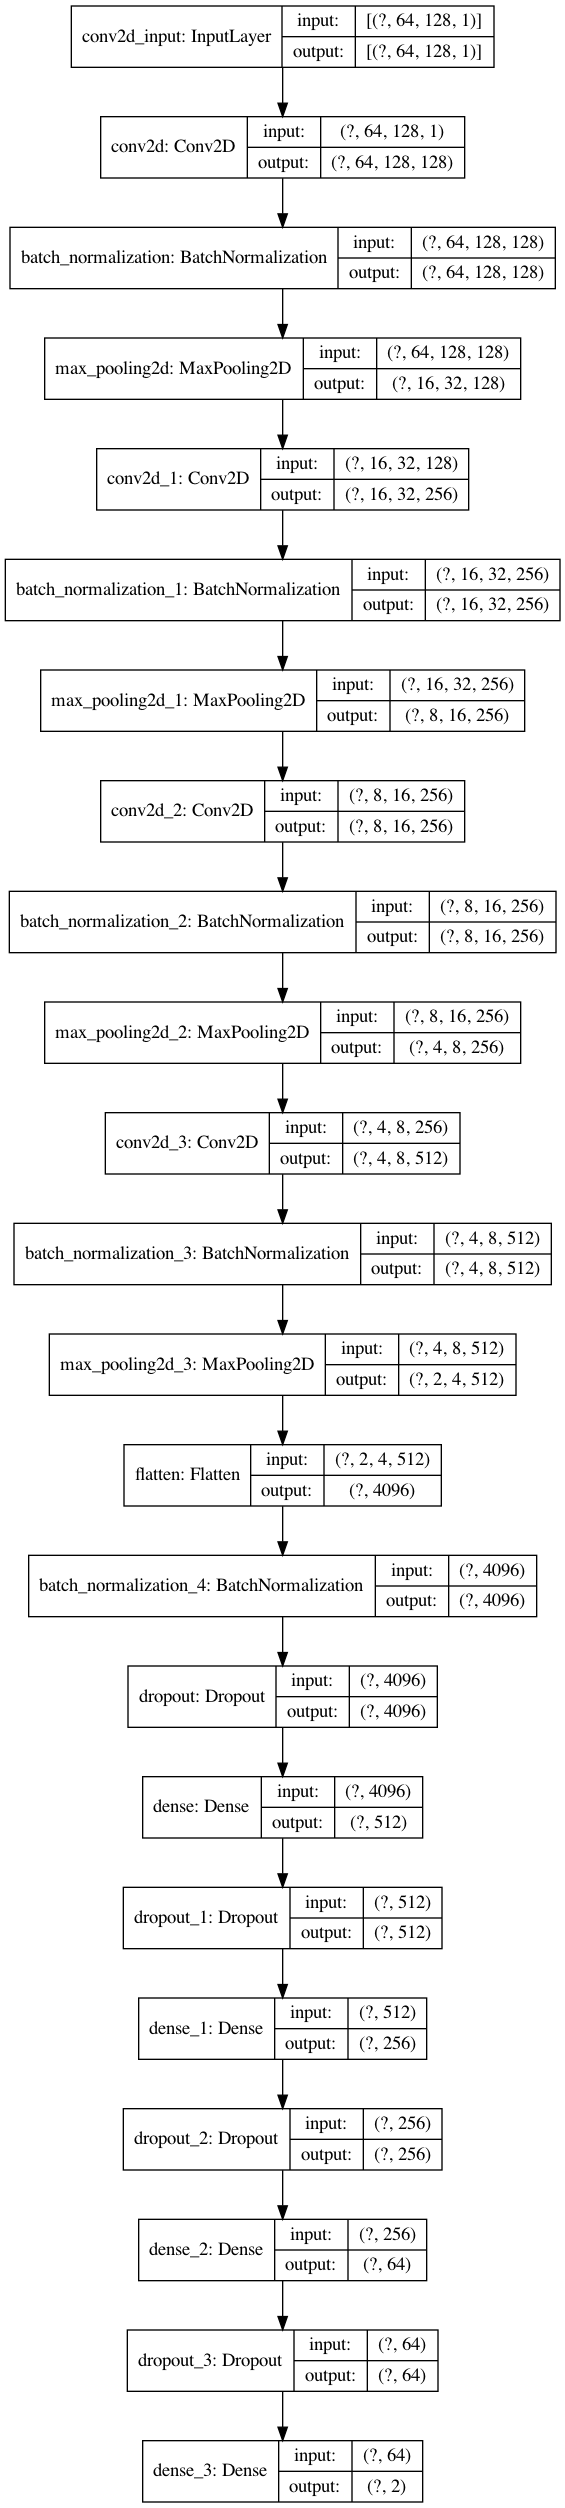

In [146]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)